<h2> Problem Description: </h2>

The competition task is to build a network intrusion detector, a predictive model capable of distinguishing between ''bad'' connections, called as intrusions or attacks, and ''good'' or normal connections. The dataset includes a wide variety of intrusions simulated in a military network environment.

<h3> What is an INTRUSION DETECTOR? </h3>

Intrusion detector is a software used to detect network intrusions. It protects a computer network from unauthorized users, including perhaps insiders. 

<h3> How the data was collected? </h3>

The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection. A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided. The 1999 KDD intrusion detection contest uses a version of this dataset.

Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN. They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.

The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic.  This was processed into about five million connection records. Similarly, the two weeks of test data yielded around two million connection records.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol. Each connection is labeled as either normal, or as an attack, with exactly one specific attack type. Each connection record consists of about 100 bytes.

<h3> Different Categories of the Attacks:- </h3>

<h6> Denial-of-service(DOS) :-</h6> A Denial-of-Service (DoS) attack is an attack meant to shut down a machine or network, making it inaccessible to its intended users. DoS attacks accomplish this by flooding the target with traffic, or sending it information that triggers a crash.e.g. syn flood;

<h6>Remote 2 Local(R2L) attack:-</h6> Remote to local attack (r2l) has been widely known to be launched by an attacker to gain unauthorized access to a victim machine in the entire network. 

<h6>User to root attack (U2R) attack:-</h6>This attack is usually launched for illegally obtaining the root’s privileges when legally accessing a local machine. , e.g. guessing password, various "buffer overflow" attacks;

<h6>Probing:-</h6> Probing is an attack in which the hacker scans a machine or a. networking device in order to determine weaknesses or. vulnerabilities that may later be exploited so as to. compromise the system. e.g., port scanning.

<h3> Different type of features and their description:- </h3>

<h5>Table 1: Basic features of individual TCP connections.</h5>

<h5>Table 2: Content features within a connection suggested by domain knowledge.</h5>

<h5>Table 3: Traffic features computed using a two-second time window.</h5>

# References:

- For determining the performance metric and classifiers used, download PDF:- https://www.researchgate.net/publication/309038723_A_review_of_KDD99_dataset_usage_in_intrusion_detection_and_machine_learning_between_2010_and_2015 


    
- https://arxiv.org/pdf/1811.05372
    

<h2> Dataset and Task Description:- </h2>
    
    http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

<h2> Importing necessary Libraries and importing dataset:- </h2>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'intrusion_type']

In [3]:
data = pd.read_csv('kddcup.data_10_percent_corrected', names=features, header=None)
data.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  intrusion_type  
0                       0.0         normal.  
1                       0.0         normal.  
2                       0.0         normal.  
3                       0.0         normal.  
4                       0.0         normal.  

[5 rows x 42 columns]

In [4]:
print('The no of data points are:',data.shape[0])
print('='*40)
print('The no of features are:',data.shape[1])
print('='*40)
print('Some of the features are:',features[:10])

The no of data points are: 494021
The no of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [5]:
output = data['intrusion_type'].values
labels = set(output)

In [6]:
print('The different type of output labels are:',labels)
print('='*125)
print('No. of different output labels are:', len(labels))

The different type of output labels are: {'neptune.', 'multihop.', 'warezmaster.', 'portsweep.', 'smurf.', 'land.', 'teardrop.', 'nmap.', 'guess_passwd.', 'normal.', 'perl.', 'spy.', 'satan.', 'ftp_write.', 'loadmodule.', 'pod.', 'back.', 'buffer_overflow.', 'phf.', 'rootkit.', 'warezclient.', 'imap.', 'ipsweep.'}
No. of different output labels are: 23


<h2> Data Cleaning:- </h2>

Checking for NULL values:-

In [7]:
print('Null values in the dataset are: ',len(data[data.isnull().any(1)]))

Null values in the dataset are:  0


Checking for DUPLICATE values:-

In [8]:
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape

(145586, 42)

In [9]:
data.to_pickle('data.pkl')
data = pd.read_pickle('data.pkl')

<h2> Exploratory Data Analysis:- </h2>

<h6> Distribution of categories in class label:- </h6>

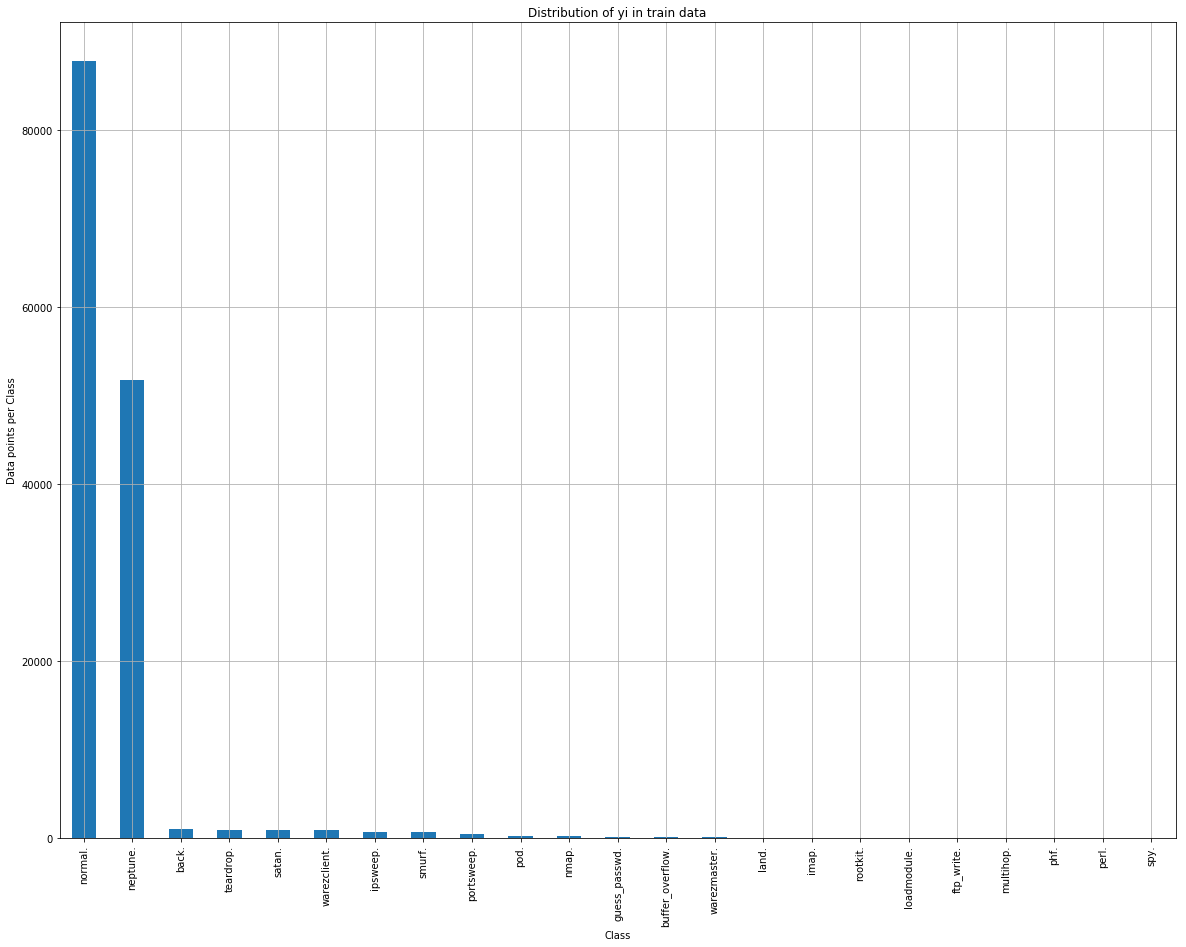

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 51820 ( 35.594 %)
Number of data points in class 3 : 968 ( 0.665 %)
Number of data points in class 4 : 918 ( 0.631 %)
Number of data points in class 5 : 906 ( 0.622 %)
Number of data points in class 6 : 893 ( 0.613 %)
Number of data points in class 7 : 651 ( 0.447 %)
Number of data points in class 8 : 641 ( 0.44 %)
Number of data points in class 9 : 416 ( 0.286 %)
Number of data points in class 10 : 206 ( 0.141 %)
Number of data points in class 11 : 158 ( 0.109 %)
Number of data points in class 12 : 53 ( 0.036 %)
Number of data points in class 13 : 30 ( 0.021 %)
Number of data points in class 14 : 20 ( 0.014 %)
Number of data points in class 15 : 19 ( 0.013 %)
Number of data points in class 16 : 12 ( 0.008 %)
Number of data points in class 17 : 10 ( 0.007 %)
Number of data points in class 18 : 9 ( 0.006 %)
Number of data points in class 19 : 8 ( 0.005 %)
Number of data points in class 20 : 7 ( 0.005 

In [10]:
plt.figure(figsize=(20,15))
class_distribution = data['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')

    

- Most of the data points are from "normal" (good connections) category which is around 60.33 %.


- In the categories that belong to bad connections, "neptune." (35.594 %) and "back." (0.665 %) have the highest no. of data points.


- Classes "rootkit.", "loadmodule.", "ftp_write.", "multihop.", "phf.", "perl.", "spy." have the least no. of data points with less than 10 data points per class.


- The dataset is highly imbalanced, thus we will need to build a model which should be able to classify data points from these low distribution classes accurately.

<h2> Performance metrics for the problem:- </h2>

- As the dataset is highly imbalanced, we will need to build a model which should be able to classify the INTRUSION categories accurately.


- We will use the CONFUSION MATRIX as that will help us to determine how well the data points belonging to each of the 23 classes are classified.


- Along with the confusion matrix, we will also calculate precision, recall and weighted f1-score to determine the best model.


- Although not preferred for imbalanced datasets, but we will also display the accuracy score that will give us an estimate of the total no. of correctly classified points.


- Some important evaluation scores that can be added for this problem are the TPR (True Positive rate) and FPR (False Positive Rate) scores.


- For this Intrusion Detection System problem, the TPR and FPR can be described as below:-


                                      Total no. of points correctly classified as "Normal" or "Good" connection points
       TPR (True Positive Rate) :- --------------------------------------------------------------------------------------
                                         Total no. of points actually belonging to "Normal" or "Good" connections
                                      
                                      
   
                                      Total no. of points INCORRECTLY classified as "Normal" or "Good" connection points
      FPR (False Positive Rate) :- --------------------------------------------------------------------------------------
                                          Total no. of points belonging to "Intrusion" or "Bad" connections

- For this problem, we want our FPR to be as low as possible. This is because, a "Normal" connection getting dropped beacuse of getting misclassified as a "Bad" connection is less severe compared to a "Bad" connection getting misclassified as a "Normal" connection, which may result in a security threat.

<h3> Univariate Analysis:- </h3>

<h5> 1. Duration:- </h5>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

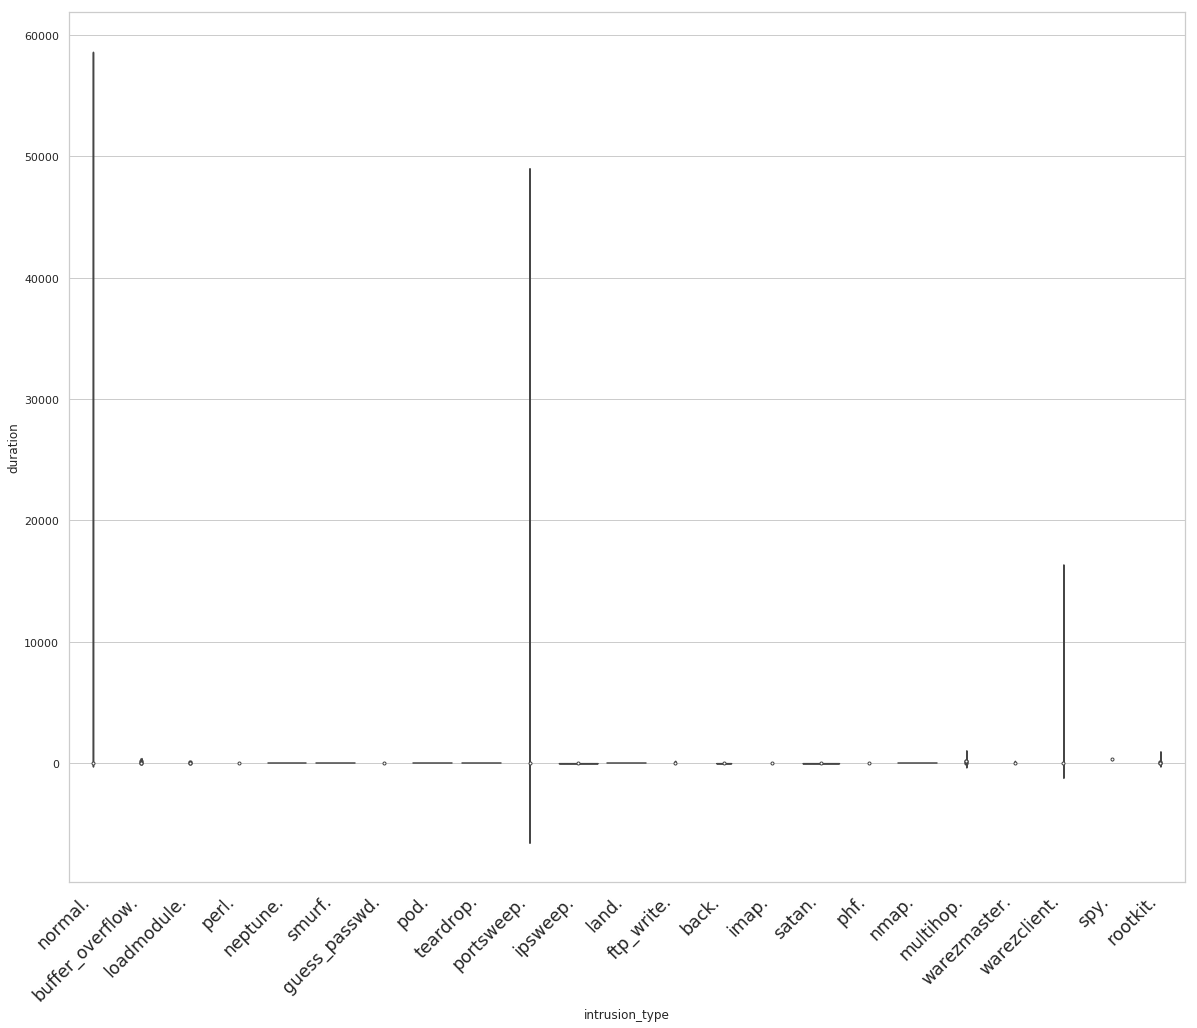

In [15]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.set(style="whitegrid")
ax = sns.violinplot(x="intrusion_type", y="duration", data=data, fliersize=None)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

- As we have relatively high no of classes, the Univariate analysis using boxplots and violin plots do not give us clear and satisfactory results.


- Thus, we can go with pairplots for BiVariate Analysis or we can go with PCA/TSNE to reduce the no. of dimensions and perform Bi/Tri-Variate Analysis.

<h3> Pair Plots for Bivariate Analysis:- </h3>

In [102]:
def pairplot(data, label, features=[]):
    '''
    This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
    '''
    sns.pairplot(data, hue=label, height=4, diag_kind='hist', vars=features,
            plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

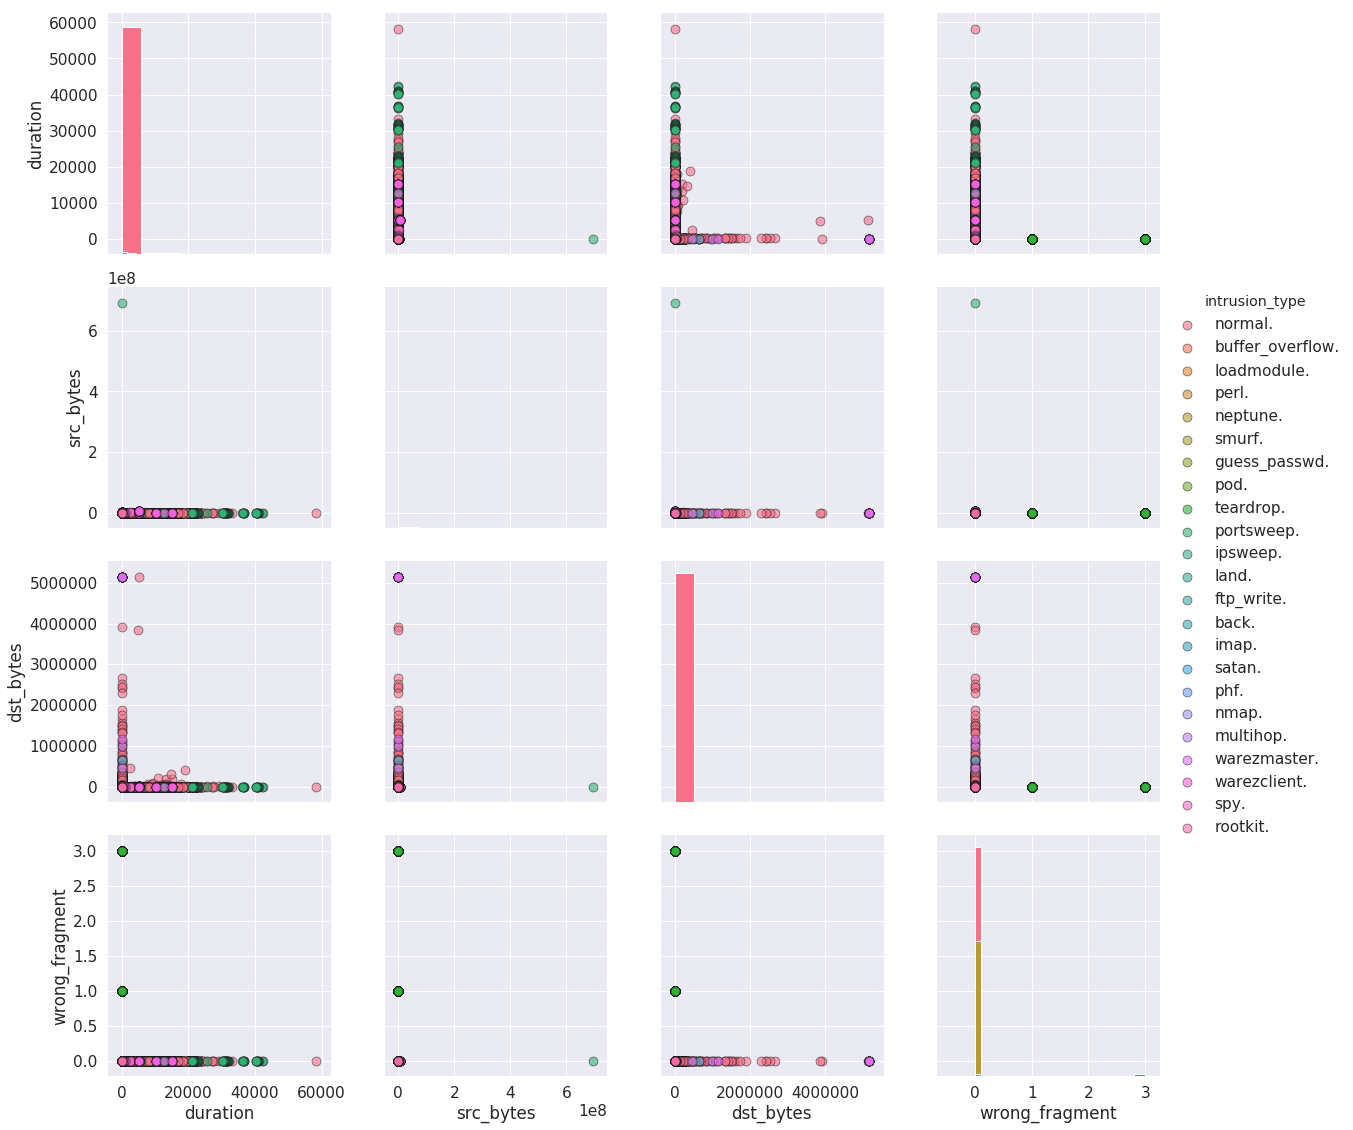

In [103]:
pairplot(data, 'intrusion_type', features=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

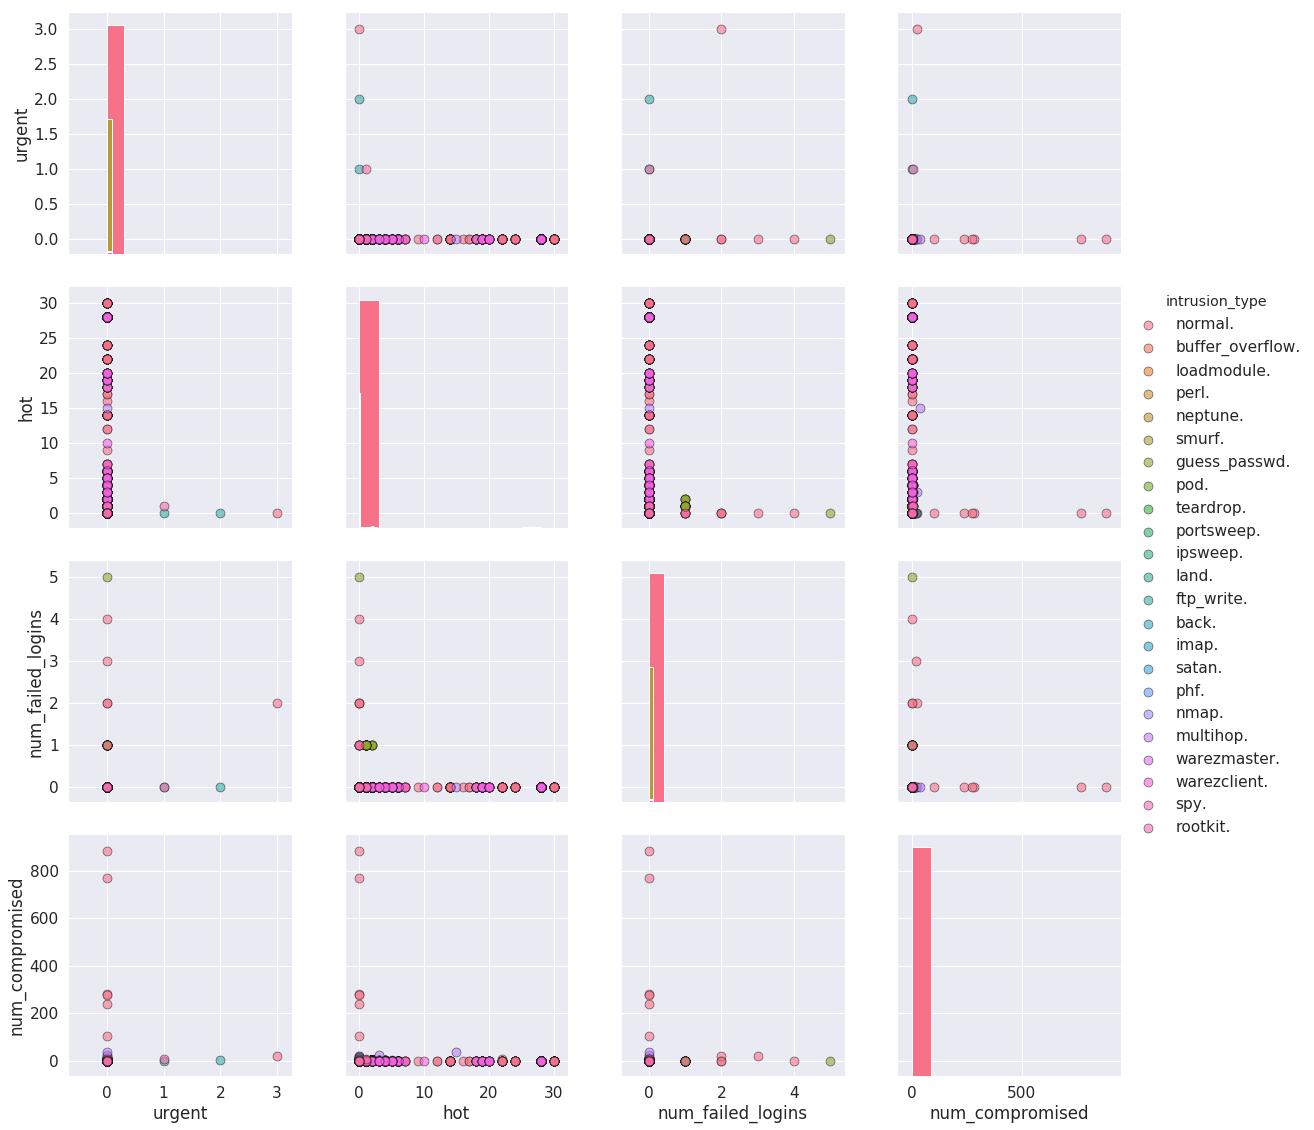

In [104]:
pairplot(data, 'intrusion_type',features=['urgent','hot','num_failed_logins','num_compromised'])

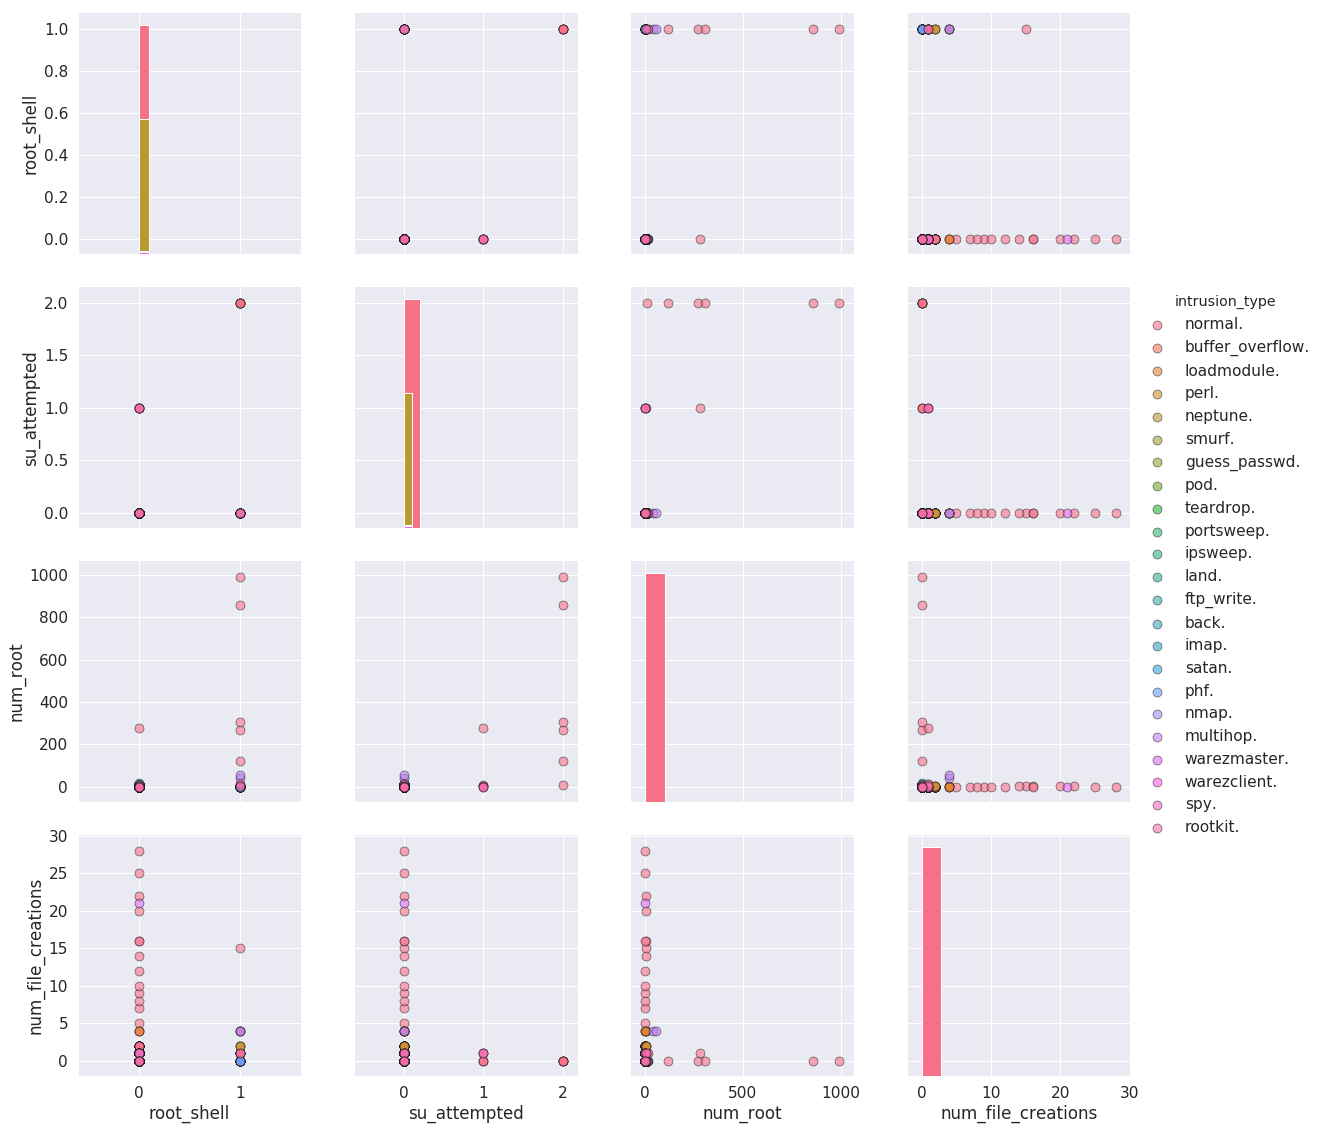

In [105]:
pairplot(data, 'intrusion_type', features=['root_shell','su_attempted','num_root','num_file_creations'])

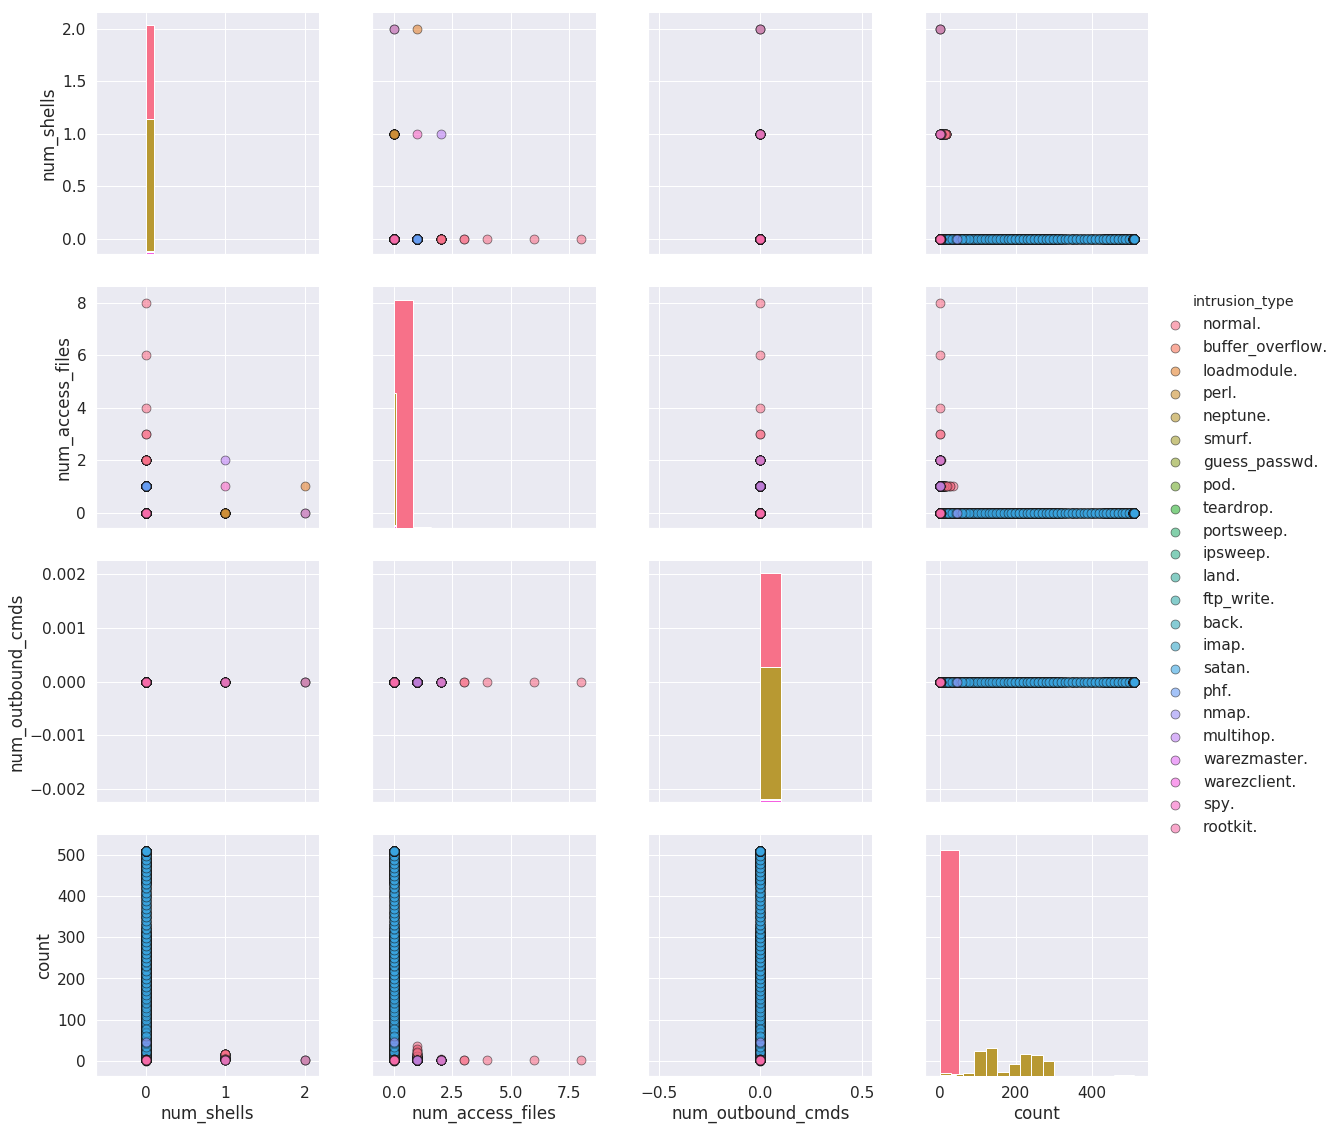

In [106]:
pairplot(data, 'intrusion_type', features=['num_shells','num_access_files','num_outbound_cmds','count'])

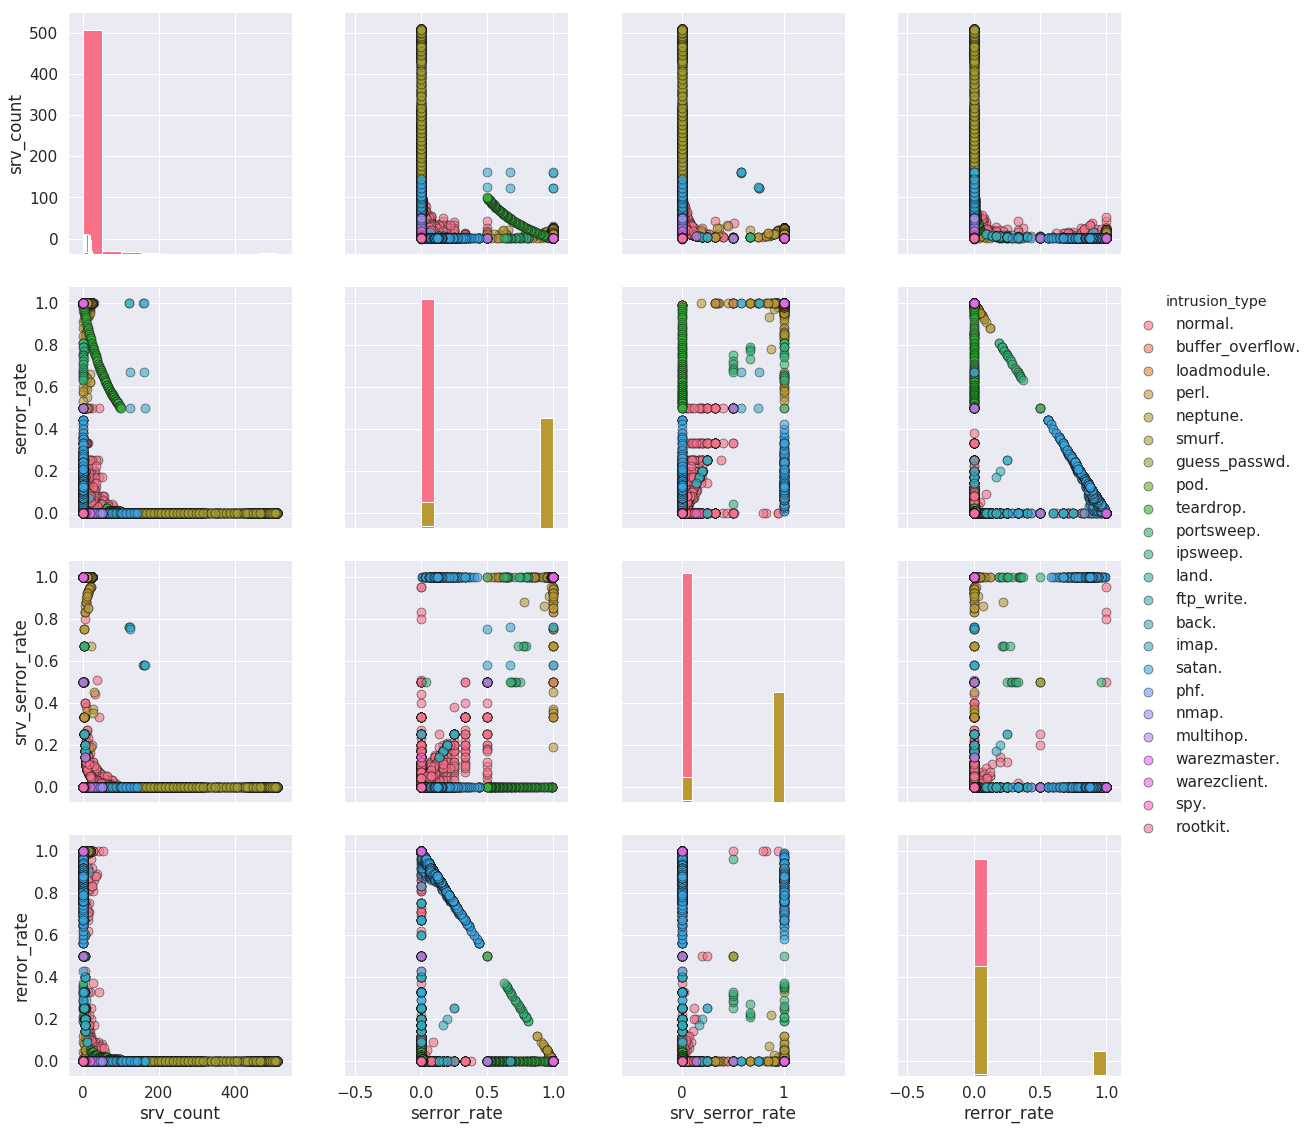

In [107]:
pairplot(data, 'intrusion_type', features=['srv_count','serror_rate','srv_serror_rate','rerror_rate'])

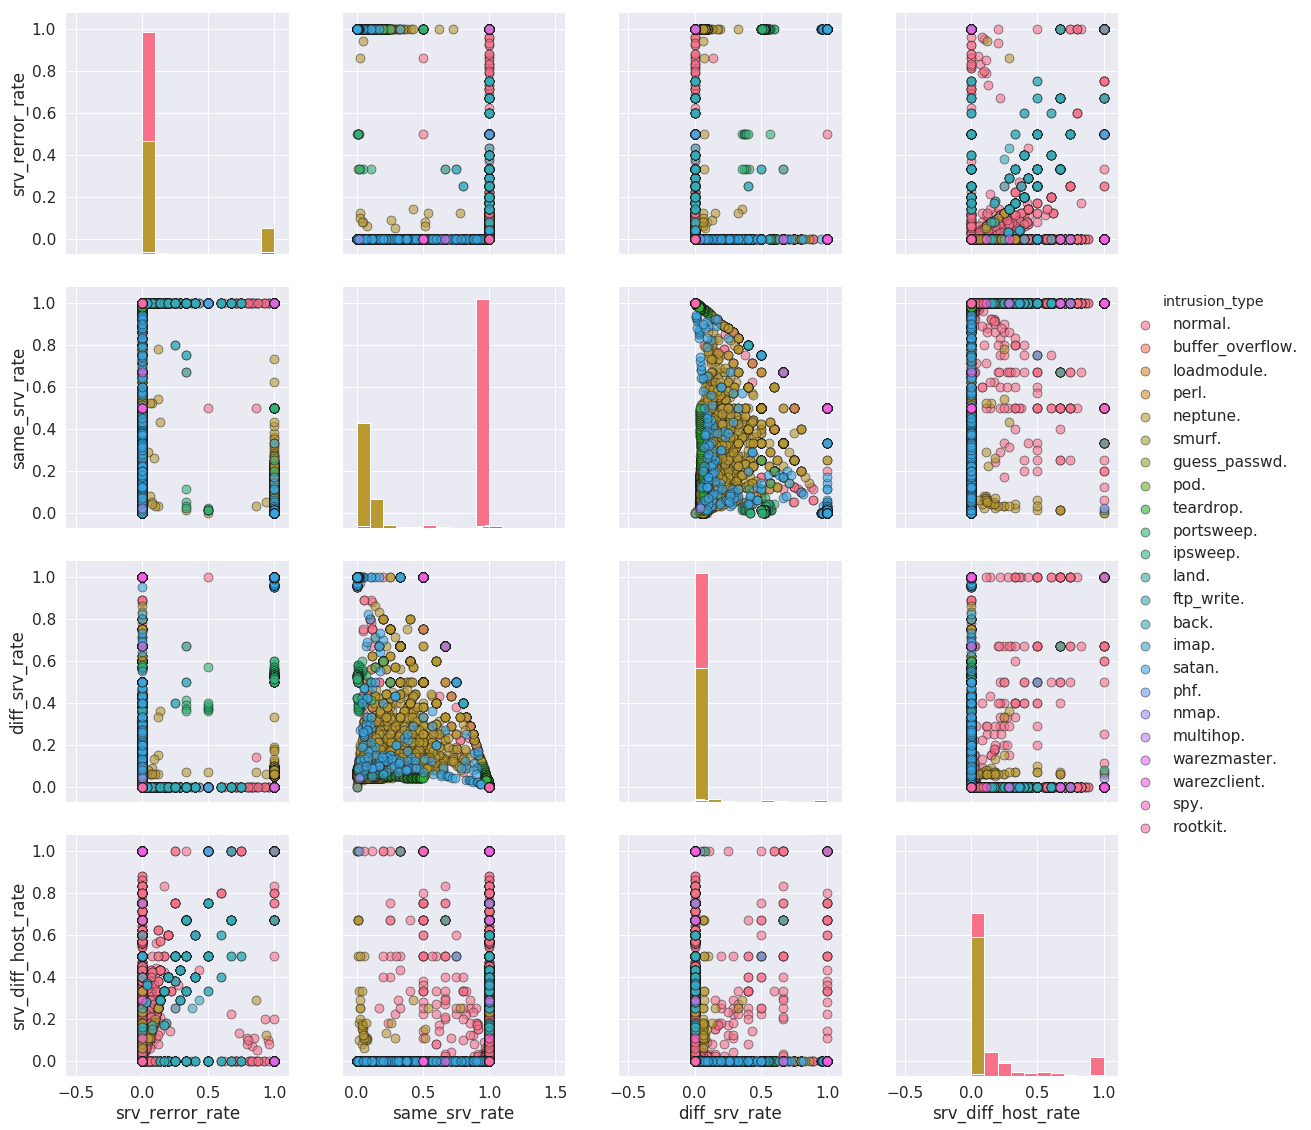

In [108]:
pairplot(data, 'intrusion_type', features=['srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate'])

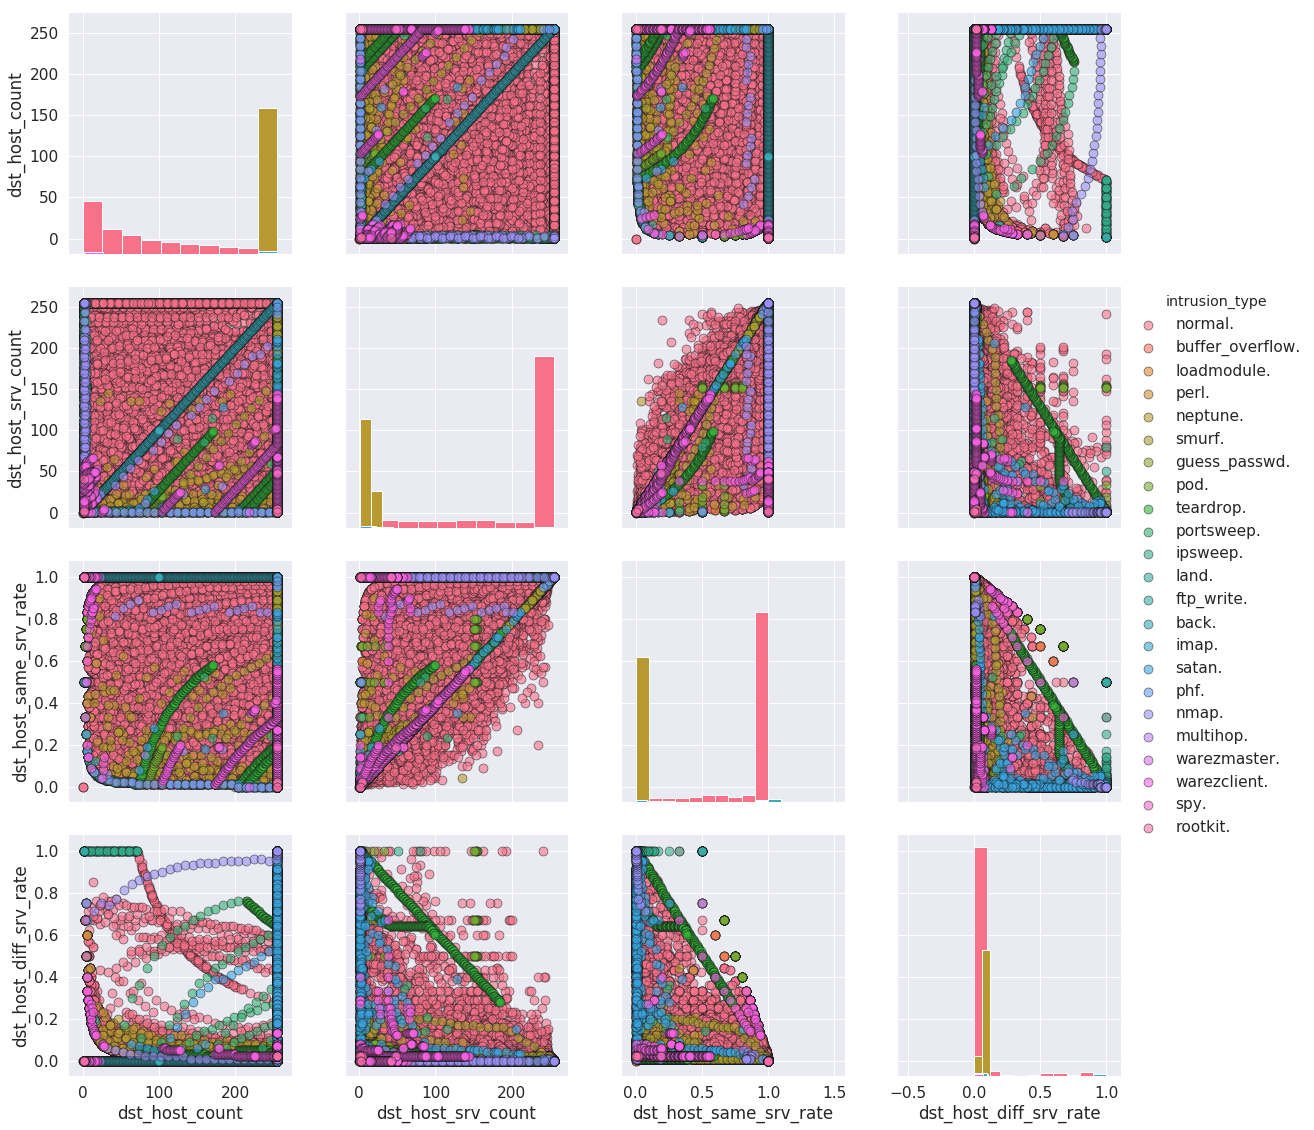

In [109]:
pairplot(data, 'intrusion_type', features=['dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'])

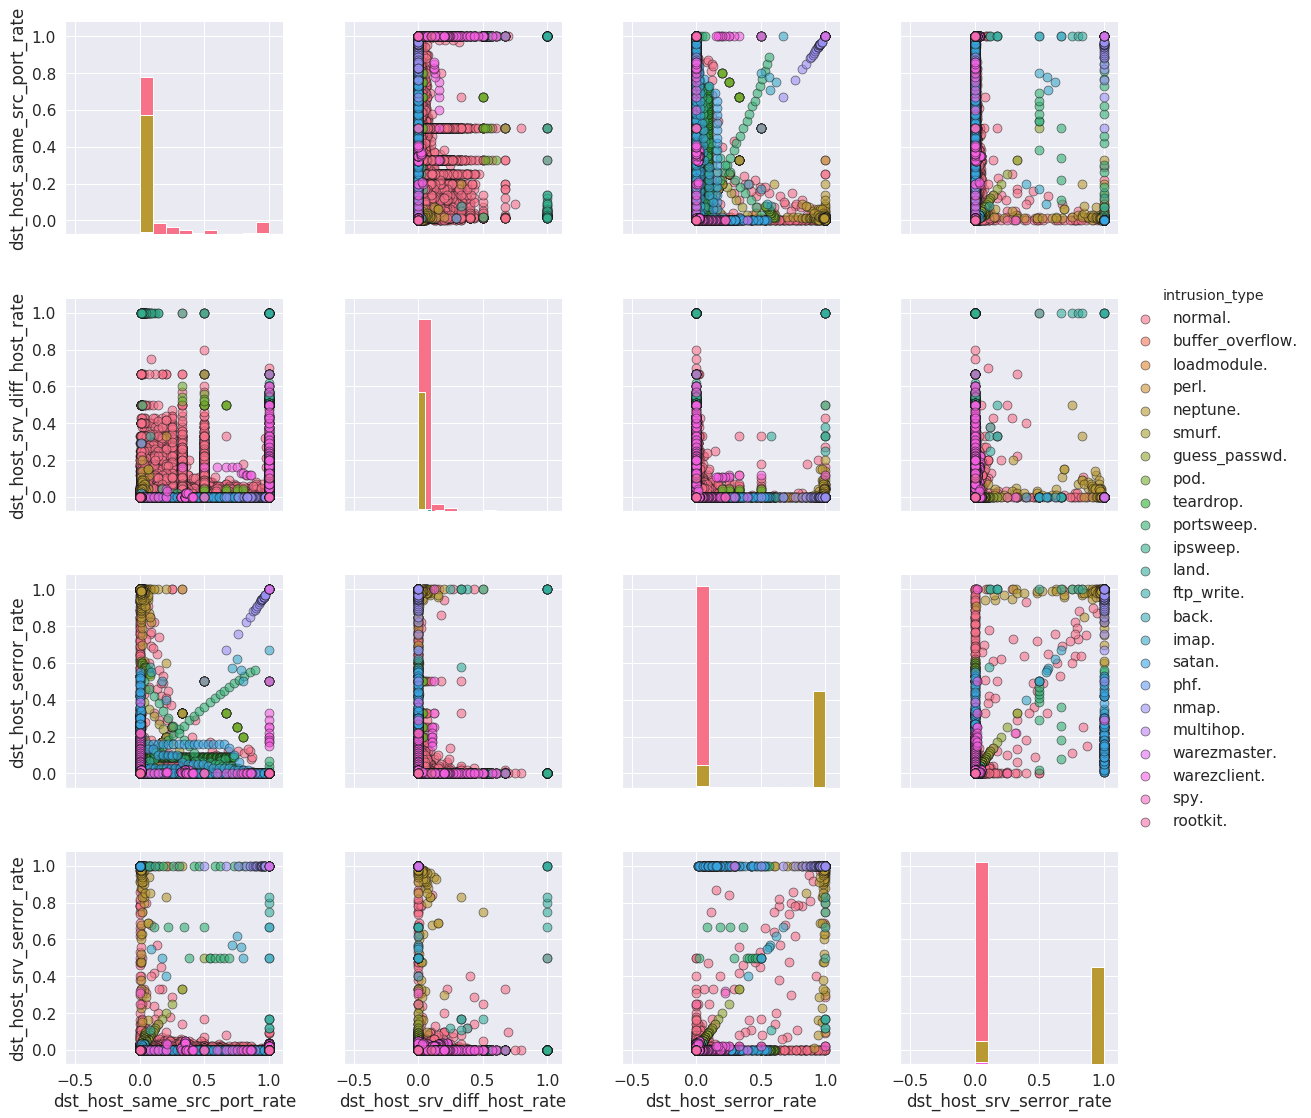

In [110]:
pairplot(data, 'intrusion_type', features=['dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'])

<h5>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>

<h5> Observations:- </h5>

- None of the pair plots are able to show linear separability/ almost linear separability between the different categories.


<h5>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>

<h3> TSNE for Bivariate Analysis:- </h3>

<h6> Without categorical features:- </h6>

In [13]:
df = data.drop(['intrusion_type','protocol_type','service','flag'], axis=1)
Y = data['intrusion_type'].values

In [14]:
from sklearn.manifold import TSNE
import joblib

In [45]:
def tsne_func(data, label, no_components, perplexity_value, n_iter_value):
    '''
    This function applies TSNE on the original dataset with no_components, perplexity_value, n_iter_value as the TSNE parameters 
    and transforms the original dataset into TSNE transformed feature space with the tsne dataset containing number of features 
    equal to the value specified for no_components and also plots the scatter plot of the transformed data points along with 
    their class label 
    '''
    print('TSNE with perplexity={} and no. of iterations={}'.format(perplexity_value, n_iter_value))
    tsne = TSNE(n_components=no_components, perplexity=perplexity_value, n_iter=n_iter_value)
    tsne_df1 = tsne.fit_transform(data)
    print(tsne_df1.shape)
    tsne_df1 = np.vstack((tsne_df1.T, Y)).T
    tsne_data1 = pd.DataFrame(data=tsne_df1, columns=['feature1', 'feature2', 'Output'])
    sns.FacetGrid(tsne_data1, hue='Output', size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()
    plt.show()

TSNE_1:-

TSNE with perplexity=100 and no. of iterations=500
(145586, 2)


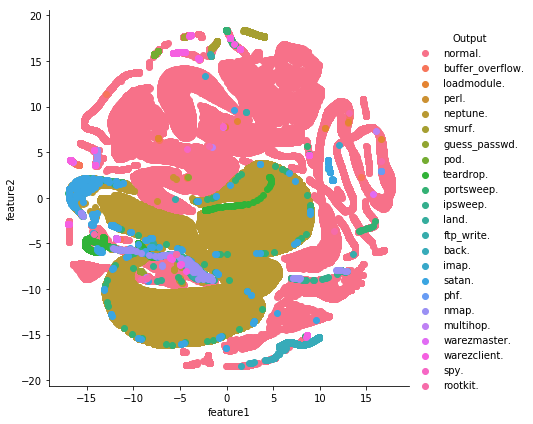

In [30]:
tsne_func(data=df, label=Y, no_components=2, perplexity_value=100, n_iter_value=500)

TSNE_2:-

TSNE with perplexity=50 and no. of iterations=500
(145586, 2)


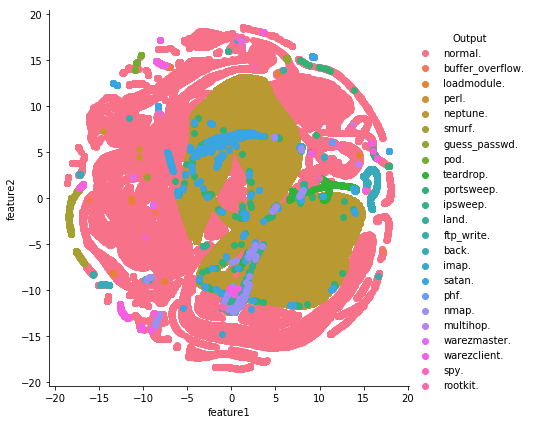

In [31]:
tsne_func(data=df, label=Y, no_components=2, perplexity_value=50, n_iter_value=1000)

<h5>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>

<h5> Observations:- </h5>
    
    - From the above 2 graphs, it can be concluded that the data is not linearly separable/almost linearly separable in the TSNE_transformed feature space.
    
<h5>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>  

<h2> Train Test Split:- </h2>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('intrusion_type', axis=1), data['intrusion_type'], stratify=data['intrusion_type'], test_size=0.25)

In [11]:
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)

Train data
(109189, 41)
(109189,)
Test data
(36397, 41)
(36397,)


<h2> Vectorizing Categorical features using one-hot encoding:- </h2>

Categorical features in our dataset are:- 'protocol_type', 'service', and 'flag'.

<h5> Protocol_type:- </h5>

In [12]:
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)

Protocol types are: ['udp', 'tcp', 'icmp']


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)

In [14]:
print(train_protocol[1].toarray())
train_protocol.shape

[[0 1 0]]


(109189, 3)

<h5> Service:- </h5>

In [15]:
service = list(X_train['service'].values)
service = list(set(service))
print('service types are:', service)

service types are: ['netbios_ssn', 'ftp_data', 'tftp_u', 'sunrpc', 'sql_net', 'klogin', 'finger', 'ctf', 'login', 'iso_tsap', 'efs', 'ssh', 'time', 'echo', 'discard', 'shell', 'uucp', 'Z39_50', 'pop_3', 'supdup', 'ftp', 'red_i', 'telnet', 'hostnames', 'remote_job', 'gopher', 'domain', 'http', 'vmnet', 'netbios_ns', 'eco_i', 'bgp', 'rje', 'netstat', 'nnsp', 'domain_u', 'urp_i', 'IRC', 'private', 'csnet_ns', 'pop_2', 'printer', 'ecr_i', 'uucp_path', 'netbios_dgm', 'tim_i', 'link', 'X11', 'urh_i', 'name', 'smtp', 'imap4', 'other', 'http_443', 'daytime', 'courier', 'systat', 'exec', 'nntp', 'mtp', 'kshell', 'ntp_u', 'auth', 'whois', 'ldap']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)

In [17]:
print(train_service[100].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [18]:
train_service.shape

(109189, 65)

<h5> Flag:- </h5>

In [19]:
flag = list(X_train['flag'].values)
flag = list(set(flag))
print('flag types are:', flag)

flag types are: ['RSTO', 'S3', 'S1', 'SH', 'OTH', 'S2', 'REJ', 'RSTR', 'S0', 'RSTOS0', 'SF']


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(binary=True)
one_hot.fit(X_train['flag'].values)
train_flag = one_hot.transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)

In [21]:
print(test_flag[3000].toarray())
train_flag.shape

[[0 0 0 0 0 0 0 0 0 1 0]]


(109189, 11)

In [22]:
X_train.drop(['protocol_type','service','flag'], axis=1, inplace=True)
X_test.drop(['protocol_type','service','flag'], axis=1, inplace=True)

<h3> Applying Standardisation on the continuous features of our dataset:- </h3>

In [23]:
def feature_scaling(X_train, X_test, feature_name):
    
    '''
    This function performs standardisation on the features
    '''
    
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))
    
    return scaler1, scaler2

<h5>  Duration:- </h5>

In [24]:
duration1, duration2 = feature_scaling(X_train, X_test, 'duration')

In [25]:
print(duration1[1])

[-0.10631]


<h5>  src_bytes :- </h5>

In [26]:
src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'src_bytes')

In [27]:
print(src_bytes1[1])

[-0.02721124]


<h5>dst_bytes:-</h5>

In [28]:
dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dst_bytes')

In [29]:
print(dst_bytes1[1])

[-0.03568432]


<h5>wrong_fragment:-</h5>

In [30]:
wrong_fragment1, wrong_fragment2 = feature_scaling(X_train, X_test, 'wrong_fragment')

In [31]:
print(wrong_fragment1[1])

[-0.08437313]


<h5>urgent :-</h5>

In [32]:
urgent1, urgent2 = feature_scaling(X_train, X_test, 'urgent')

In [33]:
print(urgent1[1])

[-0.00406023]


<h5>hot :-</h5>

In [34]:
hot1, hot2 = feature_scaling(X_train, X_test, 'hot')

In [35]:
print(hot1[1])

[-0.070225]


<h5>num_failed_logins</h5>

In [36]:
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')

In [37]:
print(num_failed_logins1[1])

[-0.01726221]


<h5>num_compromised :-</h5>

In [38]:
num_compromised1, num_compromised2 = feature_scaling(X_train, X_test, 'num_compromised')

In [39]:
num_compromised1[1]

array([-0.00749148])

<h5>root_shell :-</h5>

In [40]:
root_shell1, root_shell2 = feature_scaling(X_train, X_test, 'root_shell')

In [41]:
root_shell1[1]

array([-0.02052962])

<h5>su_attempted :-</h5>

In [42]:
su_attempted1, su_attempted2 = feature_scaling(X_train, X_test, 'su_attempted')

In [43]:
su_attempted1[1]

array([-0.00864867])

<h5>num_root:-</h5>

In [44]:
num_root1, num_root2 = feature_scaling(X_train, X_test, 'num_root')

In [45]:
num_root1[1]

array([-0.01005726])

<h5>num_file_creations:-</h5>

In [46]:
num_file_creations1, num_file_creations2 = feature_scaling(X_train, X_test, 'num_file_creations')

In [47]:
num_file_creations1[1]

array([-0.02108068])

<h5>num_shells:-</h5>

In [48]:
num_shells1, num_shells2 = feature_scaling(X_train, X_test, 'num_shells')

In [49]:
num_shells1[1]

array([-0.0195413])

<h5>num_access_files:-</h5>

In [50]:
num_access_files1, num_access_files2 = feature_scaling(X_train, X_test, 'num_access_files')

In [51]:
num_access_files1[1]

array([-0.04918146])

<h5>num_outbound_cmds:-</h5>

In [52]:
data['num_outbound_cmds'].value_counts()

0    145586
Name: num_outbound_cmds, dtype: int64

  <h5>- We will not use 'num_outbound_cmds' feature as it has all zero values.</h5>

<h5>srv_count:-</h5>

In [53]:
srv_count1, srv_count2 = feature_scaling(X_train, X_test, 'srv_count')

In [54]:
srv_count1[1]

array([-0.16326871])

<h5>serror_rate:-</h5>

In [55]:
serror_rate1, serror_rate2 = feature_scaling(X_train, X_test, 'serror_rate')

In [56]:
serror_rate1[1]

array([-0.64362885])

<h5>srv_serror_rate:-</h5>

In [57]:
srv_serror_rate1, srv_serror_rate2 = feature_scaling(X_train, X_test, 'srv_serror_rate')

In [58]:
srv_serror_rate1[1]

array([-0.64318832])

<h5>rerror_rate:-</h5>

In [59]:
rerror_rate1, rerror_rate2 = feature_scaling(X_train, X_test, 'rerror_rate')

In [60]:
rerror_rate1[1]

array([-0.35064812])

<h5>srv_rerror_rate :-</h5>

In [61]:
srv_rerror_rate1, srv_rerror_rate2 = feature_scaling(X_train, X_test, 'srv_rerror_rate')

In [62]:
srv_rerror_rate1[1]

array([-0.35094472])

<h5>same_srv_rate:-</h5>

In [63]:
same_srv_rate1, same_srv_rate2 = feature_scaling(X_train, X_test, 'same_srv_rate')

In [64]:
same_srv_rate1[1]

array([0.77198969])

<h5>diff_srv_rate:-</h5>

In [65]:
diff_srv_rate1, diff_srv_rate2 = feature_scaling(X_train, X_test, 'diff_srv_rate')

In [66]:
diff_srv_rate1[1]

array([-0.33733601])

<h5>srv_diff_host_rate:-</h5>

In [67]:
srv_diff_host_rate1, srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'srv_diff_host_rate')

In [68]:
srv_diff_host_rate1[1]

array([-0.38474854])

<h5>dst_host_count:-</h5>

In [69]:
dst_host_count1, dst_host_count2 = feature_scaling(X_train, X_test, 'dst_host_count')

In [70]:
dst_host_count1[1]

array([-1.73709521])

<h5>dst_host_srv_count:-</h5>

In [71]:
dst_host_srv_count1, dst_host_srv_count2 = feature_scaling(X_train, X_test, 'dst_host_srv_count')

In [72]:
dst_host_srv_count1[1]

array([1.09154426])

<h5>dst_host_same_srv_rate:-</h5>

In [73]:
dst_host_same_srv_rate1, dst_host_same_srv_rate2= feature_scaling(X_train, X_test, 'dst_host_same_srv_rate')

In [74]:
dst_host_same_srv_rate1[1]

array([0.98033174])

<h5>dst_host_diff_srv_rate:-</h5>

In [75]:
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')

In [76]:
dst_host_diff_srv_rate1[1]

array([-0.41795402])

<h5>dst_host_same_src_port_rate:-</h5>

In [77]:
dst_host_same_src_port_rate1, dst_host_same_src_port_rate2 = feature_scaling(X_train, X_test, 'dst_host_same_src_port_rate')

In [78]:
dst_host_same_src_port_rate1[1]

array([0.07124263])

<h5>dst_host_srv_diff_host_rate:-</h5>

In [79]:
dst_host_srv_diff_host_rate1, dst_host_srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_diff_host_rate')

In [80]:
dst_host_srv_diff_host_rate1[1]

array([0.34166747])

<h5>dst_host_serror_rate:-</h5>

In [81]:
dst_host_serror_rate1, dst_host_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_serror_rate')

In [82]:
dst_host_serror_rate1[1]

array([-0.64453004])

<h5>dst_host_srv_serror_rate:-</h5>

In [83]:
dst_host_srv_serror_rate1, dst_host_srv_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_serror_rate')

In [84]:
dst_host_srv_serror_rate1[1]

array([-0.64195616])

<h5>dst_host_rerror_rate:-</h5>

In [85]:
dst_host_rerror_rate1, dst_host_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_rerror_rate')

In [86]:
dst_host_rerror_rate1[1]

array([-0.36105885])

<h5>dst_host_srv_rerror_rate:-</h5>

In [87]:
dst_host_srv_rerror_rate1, dst_host_srv_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_rerror_rate')

In [88]:
dst_host_srv_rerror_rate1[1]

array([-0.35401569])

<h5>num_failed_logins :-</h5>

In [89]:
num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')

In [90]:
num_failed_logins1[1]

array([-0.01726221])

<h5>land:-</h5>

In [91]:
land1, land2 = np.array([X_train['land'].values]), np.array([X_test['land'].values])

In [92]:
land1.shape

(1, 109189)

<h5>is_host_login :-</h5>

In [93]:
is_host_login1, is_host_login2 = np.array([X_train['is_host_login'].values]), np.array([X_test['is_host_login'].values])

In [94]:
is_host_login1.shape

(1, 109189)

<h5>is_guest_login :-</h5>

In [95]:
is_guest_login1, is_guest_login2 = np.array([X_train['is_guest_login'].values]), np.array([X_test['is_guest_login'].values])

In [96]:
is_guest_login1.shape

(1, 109189)

<h5>logged_in :-</h5>

In [97]:
logged_in1, logged_in2 = np.array([X_train['logged_in'].values]), np.array([X_test['logged_in'].values])

In [98]:
logged_in1.shape

(1, 109189)

<h5>count:-</h5>

In [99]:
count1, count2 = feature_scaling(X_train, X_test, 'count')

In [100]:
count1[1]

array([-0.66140644])

<h5>dst_host_diff_srv_rate:-</h5>

In [101]:
dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')

In [102]:
dst_host_diff_srv_rate1[1]

array([-0.41795402])

<h3> Merging categorical and continuous features:- </h3>

In [103]:
from scipy.sparse import hstack

In [104]:
X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1,
       dst_bytes1, land1.T, wrong_fragment1, urgent1, hot1,
       num_failed_logins1, logged_in1.T, num_compromised1, root_shell1,
       su_attempted1, num_root1, num_file_creations1, num_shells1,
       num_access_files1, is_host_login1.T,
       is_guest_login1.T, count1, srv_count1, serror_rate1,
       srv_serror_rate1, rerror_rate1, srv_rerror_rate1, same_srv_rate1,
       diff_srv_rate1, srv_diff_host_rate1, dst_host_count1,
       dst_host_srv_count1, dst_host_same_srv_rate1,
       dst_host_diff_srv_rate1, dst_host_same_src_port_rate1,
       dst_host_srv_diff_host_rate1, dst_host_serror_rate1,
       dst_host_srv_serror_rate1, dst_host_rerror_rate1,
       dst_host_srv_rerror_rate1))

In [105]:
X_train_1.shape

(109189, 116)

In [106]:
X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2,
       dst_bytes2, land2.T, wrong_fragment2, urgent2, hot2,
       num_failed_logins2, logged_in2.T, num_compromised2, root_shell2,
       su_attempted2, num_root2, num_file_creations2, num_shells2,
       num_access_files2, is_host_login2.T,
       is_guest_login2.T, count2, srv_count2, serror_rate2,
       srv_serror_rate2, rerror_rate2, srv_rerror_rate2, same_srv_rate2,
       diff_srv_rate2, srv_diff_host_rate2, dst_host_count2,
       dst_host_srv_count2, dst_host_same_srv_rate2,
       dst_host_diff_srv_rate2, dst_host_same_src_port_rate2,
       dst_host_srv_diff_host_rate2, dst_host_serror_rate2,
       dst_host_srv_serror_rate2, dst_host_rerror_rate2,
       dst_host_srv_rerror_rate2))

In [107]:
X_test_1.shape

(36397, 116)

In [108]:
import joblib
joblib.dump(X_train_1,'X_train_1.pkl')
joblib.dump(X_test_1,'X_test_1.pkl')
X_train_1 = joblib.load('X_train_1.pkl')
X_test_1 = joblib.load('X_test_1.pkl')

<h3> Further Approach to our problem </h3>

- <h6> We will first apply below classifiers on our dataset and evaluate their performance: </h6>
    
    
    1. Naive Bayes
    2. Logistic Regression
    3. SVM 
    4. Decision Tree
    5. Random Forest
    6. GBDT / XGBoost
    
    
- <h6> Based on the performance metric scores we obtain from the above classifiers, we will apply below feature engineering techniques on our dataset to get additional features: </h6>
    
    
    1. Clustering features:- We will apply clustering on our dataset and add the clustering values as an additional feature to our dataset.
    
    2. PCA transformed features:- We will apply PCA/TSNE/SVD on the dataset and will use the top 5 PCA features as additional features on our dataset.  
    
    3. Feature engineering using existing features:- We will apply feature engineering techniques like 
        (i) Adding 2 existing features, (e.g. new_feature_1 = src_bytes + dst_bytes) 
        (ii)Subtracting 2 existing features, (e.g. new_feature_2 = abs(src_bytes - dst_bytes).
        
        
        
- <h6> We will then apply the best performing classifiers from dataset 1 on dataset 2 and evaluate their performance. </h6>

<h2> Applying Machine Algorithms:- </h2>

<h5> Utility Functions:- </h5>

In [111]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [112]:
def confusion_matrix_func(Y_test, y_test_pred):
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
              'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf',
              'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [113]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results['accuracy'] = accuracy_score(Y_test, y_test_pred)
    print('='*50)
    print('Performance metrics:')
    print('='*50)
    print('Accuracy is:')
    print(accuracy_score(Y_test, y_test_pred))
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [114]:
def print_grid_search_attributes(model):
    
    '''
    This function prints all the grid search attributes
    '''
    
    print('---------------------------')
    print('|      Best Estimator     |')
    print('---------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('---------------------------')
    print('|     Best parameters     |')
    print('---------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('----------------------------------')
    print('|   No of CrossValidation sets   |')
    print('----------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('---------------------------')
    print('|        Best Score       |')
    print('---------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

<h3> Model_1 :- Gaussian Naive Bayes </h3>

In [114]:
hyperparameter = {'var_smoothing':[10**x for x in range(-9,3)]}

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_grid = GridSearchCV(nb, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.1s finished


Completed
Time taken: 0:00:15.839298
Prediction on test data:
Completed
Time taken: 0:00:00.609461
Performance metrics:
Accuracy is:
0.9739264225073495
Confusion Matrix is:


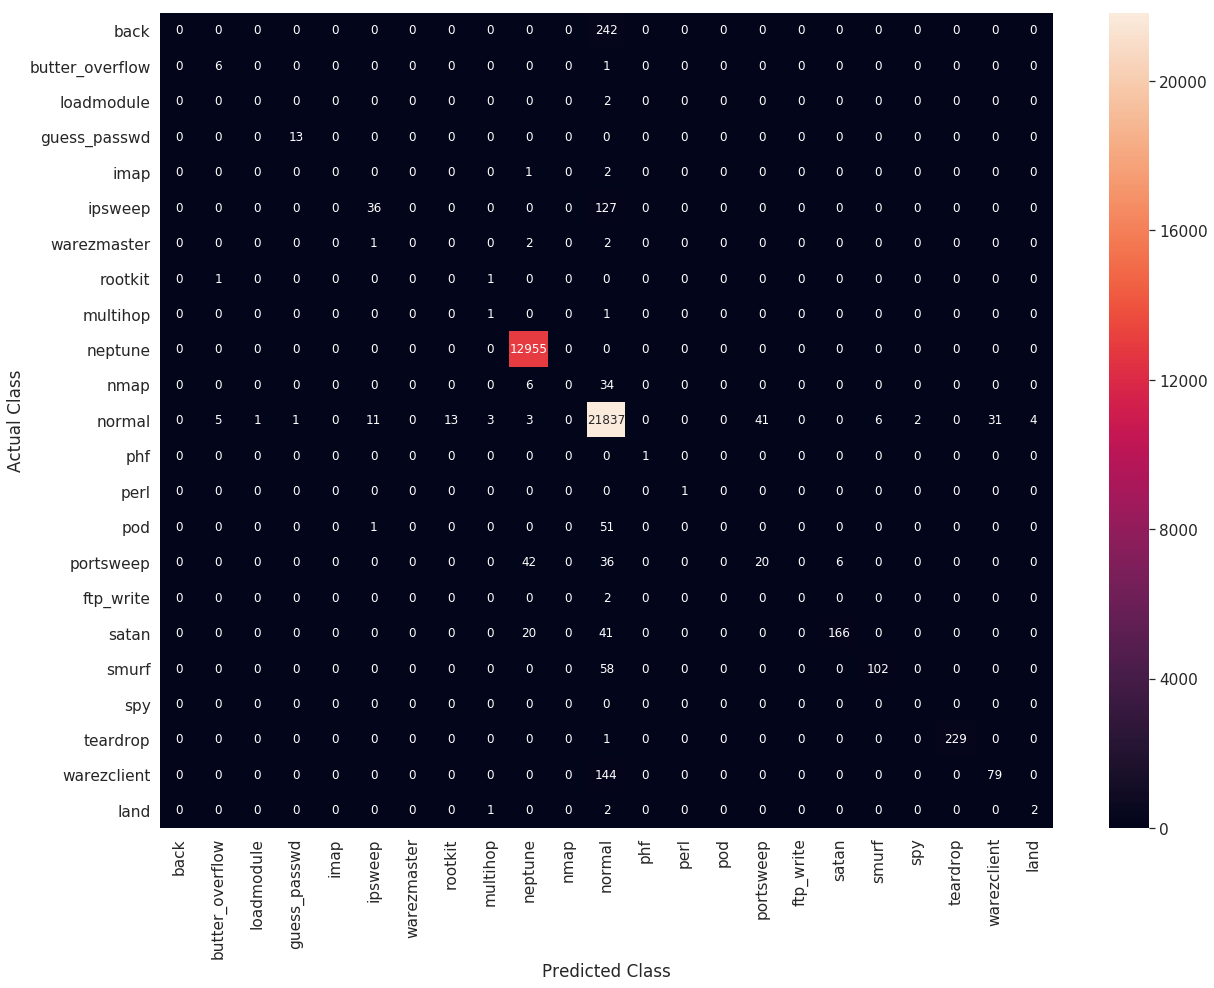

Precision score is:
0.9629320630153876
Recall score is:
0.9739264225073495
F1-score is:
0.967016418516705


In [116]:
nb_grid_results = model(nb_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [135]:
print_grid_search_attributes(nb_grid)

---------------------------
|      Best Estimator     |
---------------------------

	GaussianNB(priors=None, var_smoothing=10)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'var_smoothing': 10}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9729551511599154



In [118]:
joblib.dump(nb_grid.best_estimator_, 'nb_gs.pkl')

['nb_gs.pkl']

In [119]:
nb_grid_results

{'accuracy': 0.9739264225073495,
 'f1_score': 0.967016418516705,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>,
 'precision': 0.9629320630153876,
 'recall': 0.9739264225073495}

<h6> Observations from applying Naive Bayes Classifier:- </h6>



    
- The test data has 39367 total no. of points. Out of these, 21958 are points belonging to Normal connections and remaining 17409 points belong to Bad connections.
    

- Out of the 21958 Normal connection points, 21847 (99.49%) were classified correctly by the Naive Bayes Classifier.
  
  
- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12955(100.0%) are classified correctly.
    
    
- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100.0% accuracy, class butter_overflow with (6/7) 85.71% accuracy,class warezmaster with(0/5) 0% accuracy, class land with(2/5) 40% accuracy, class imap with(0/3) 0% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(1/2) 50% accuracy, class multihop with (1/2) 50% accuracy, class ftp_write with(0/2) 0% accuracy, and classes phf and perl with both (1/1) 100% accuracy.
    
    
- Although the Naive bayes Classifier was able to classify points with good accuracy (97.39%) and with high f1 score of 0.9670, we can use more advanced Non-linear and linear classifiers ahead where we will try to classify Normal and bad connections with accuracy close to 100 and also with f1 score close to 1.


- True Postives = 21837
- TPR = 0.9944
- False Positives = 746
- FPR = 0.051

<h3> Model_2:- Logistic Regression </h3>

In [121]:
hyperparameter = {'alpha':[0.001, 0.01, 0.1, 1, 10, 20, 30], 'penalty':['l1', 'l2']}
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(loss='log')
lr_grid = GridSearchCV(lr, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  4.1min finished


Completed
Time taken: 0:04:18.762182
Prediction on test data:
Completed
Time taken: 0:00:00.015683
Performance metrics:
Accuracy is:
0.984724015715581
Confusion Matrix is:


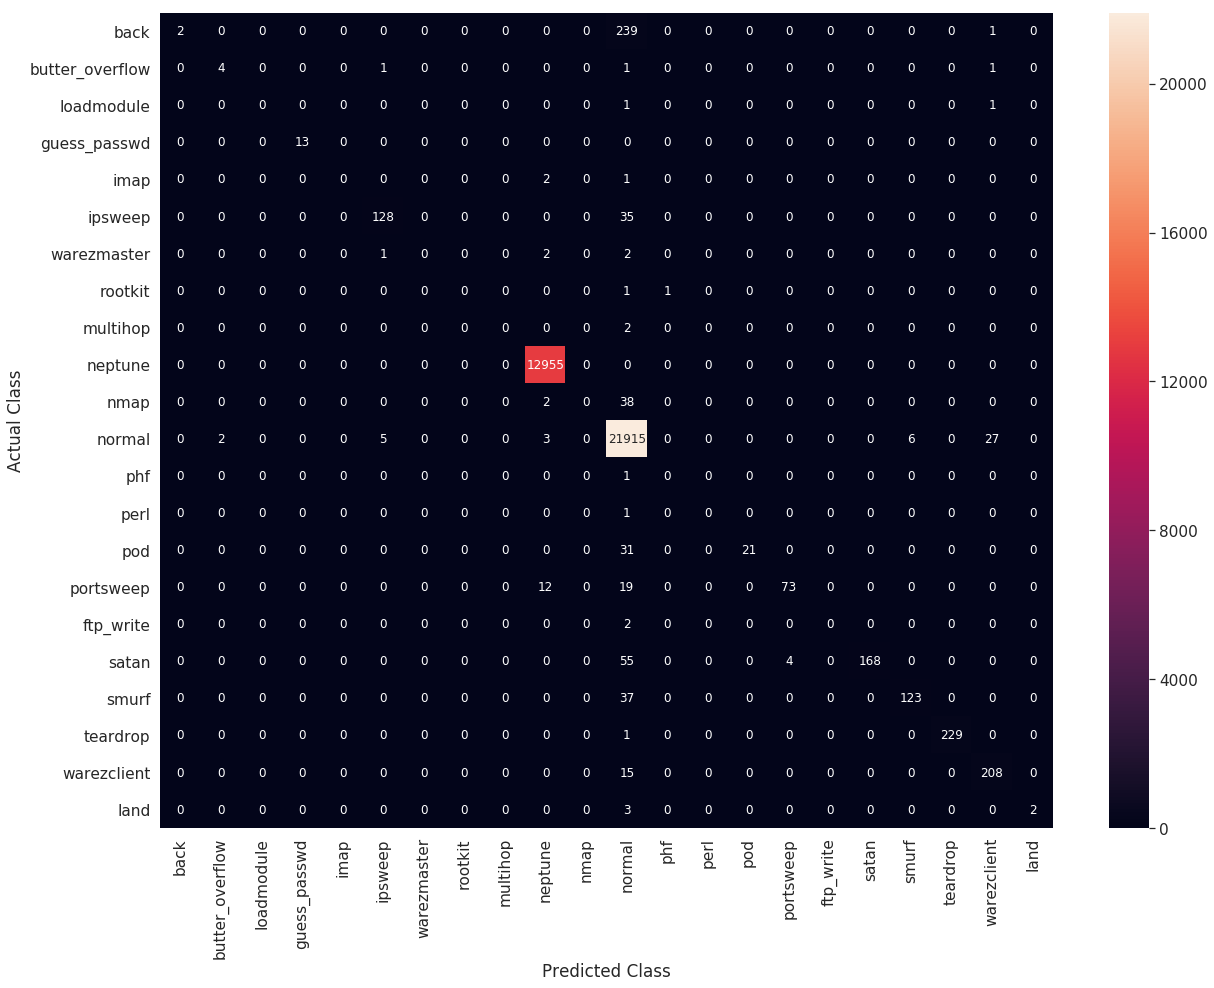

Precision score is:
0.983346572199778
Recall score is:
0.984724015715581
F1-score is:
0.9802764997679481


In [122]:
lr_grid_results = model(lr_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [136]:
print_grid_search_attributes(lr_grid)

---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'alpha': 0.001}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9844489829561586



In [127]:
joblib.dump(lr_grid.best_estimator_, 'lr_gs.pkl')

['lr_gs.pkl']

In [128]:
lr_grid_results

{'accuracy': 0.984724015715581,
 'f1_score': 0.9802764997679481,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>,
 'precision': 0.983346572199778,
 'recall': 0.984724015715581}

<h6> Observations from applying Logistic Regression Classifier:- </h6>


- Out of the 21958 Normal connection points, 21938 (99.80%) were correctly classified by the LR Classifier.
    

- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12955(100.0%) were classified correctly.
    

- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100% accuracy, class butter_overflow with (4/7) 57.14% accuracy, class warezmaster with(0/5) 0% accuracy, class land with(2/5) 40% accuracy, class imap with(0/3) 0% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, and class phf with (0/1)
0% accuracy and class perl with (0/1) 0% accuracy.
        

- Classes with very low no. of data points like loadmodule, multihop, ftp_write, phf were not classified correctly by this classifier.
    

- The Logistic Regression Classifier was able to classify points with better acuuracy of 98.47% and high f1 score of 0.9802 
compared to Naive Bayes Classifier. 
        

- From the good performance of Logistic Regression model, we can conclude that the data has some linearity in the higher dimensional space which was not visible in the lower dimensional 2D pair plots and Tsne transformed 2D space.


- True Postives = 21915

- TPR = 0.9980

- False Positives = 485

- FPR = 0.0336


- LR model has a lower FPR than the NB Classifier.

<h3> Model_3 :- SVM (SGD_Classifier with loss='hinge') </h3>

In [129]:
hyperparameter = {'alpha':[10**x for x in range(-8,3)], 'penalty':['l1', 'l2']}

from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge')
svm_grid = GridSearchCV(svm, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  6.6min finished


Completed
Time taken: 0:08:53.461901
Prediction on test data:
Completed
Time taken: 0:00:00.014209
Performance metrics:
Accuracy is:
0.9970052476852488
Confusion Matrix is:


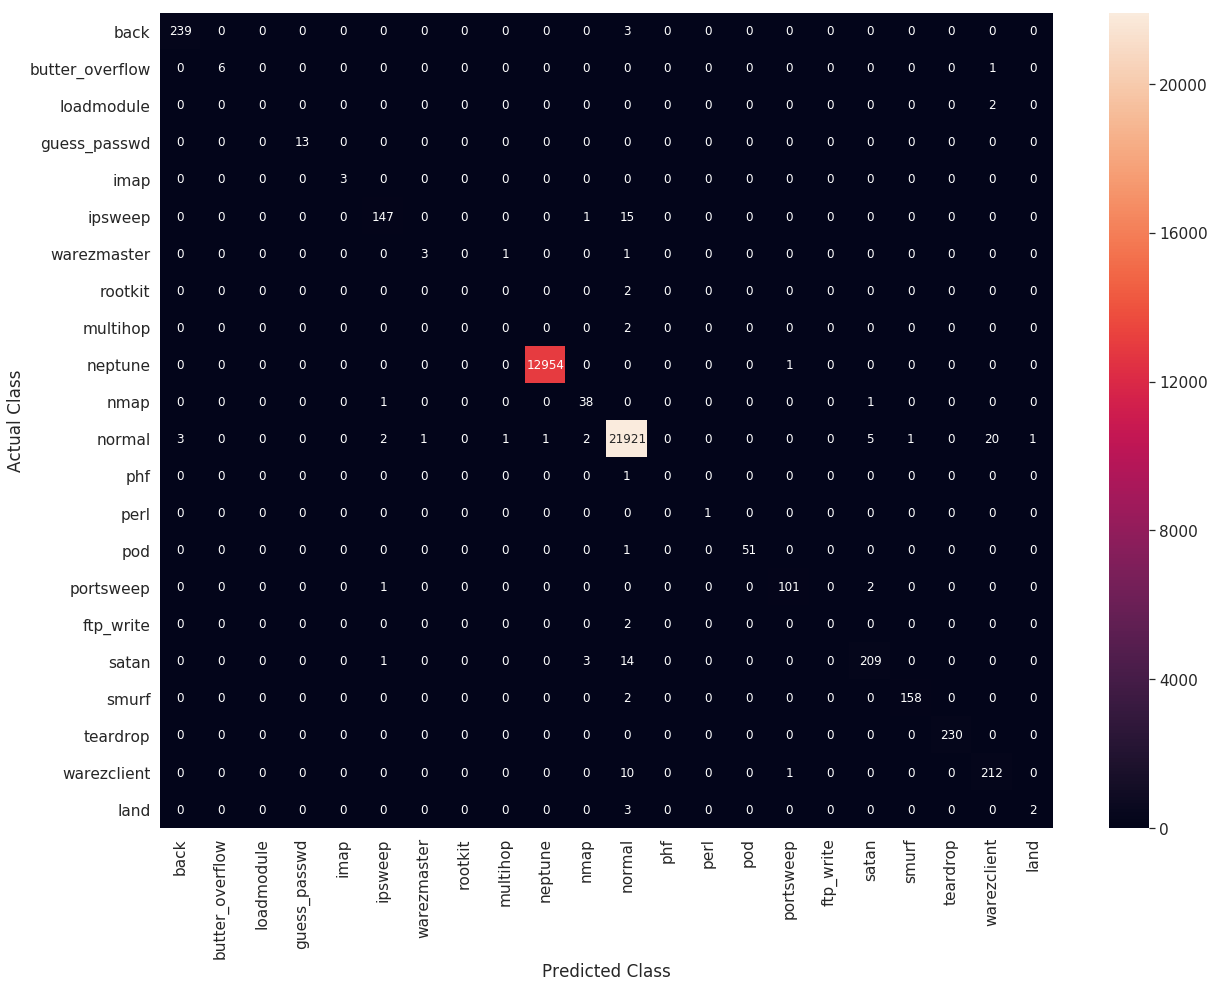

Precision score is:
0.9968155468234061
Recall score is:
0.9970052476852488
F1-score is:
0.996889023237283


In [130]:
svm_grid_results = model(svm_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [139]:
print_grid_search_attributes(svm_grid)

---------------------------
|      Best Estimator     |
---------------------------

	SGDClassifier(alpha=1e-06, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'penalty': 'l1', 'alpha': 1e-06}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 5

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9966754892892141



In [140]:
joblib.dump(svm_grid.best_estimator_, 'svm_gs.pkl')

['svm_gs.pkl']

In [141]:
svm_grid_results

{'accuracy': 0.9970052476852488,
 'f1_score': 0.996889023237283,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>,
 'precision': 0.9968155468234061,
 'recall': 0.9970052476852488}

<h6> Observations from applying SVM Classifier (SGD Classifier + "hinge" loss):- </h6>


    
    
- Out of the 21958 Normal connection points, 21921 (99.83%) were correctly classified by the SVM Classifier.
    

- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12954(99.99%) were classified correctly.
    

- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100.0% accuracy, class buffer_overflow with (6/7) 85.71% accuracy,class warezmaster with(3/5) 60% accuracy, class land with(2/5) 40% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, and class phf with (0/1)0% accuracy and class perl with (1/1) 100% accuracy.
 
 
- The SVM Classifier was able to classify points with better accuracy of 99.70% and high f1 score of 0.9968 compared to Naive Bayes and LR Classifiers. 
        


- True Postives = 21921


- TPR = 0.9983


- False Positives = 56


- FPR = 0.0038


- The SVM Classifier has the lowest FPR, thus, it's performance is comparatively better than NB and LR models.

<h3> Model_4 :- Decision Tree </h3>

In [350]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   36.3s finished


Completed
Time taken: 0:00:40.189995
Prediction on test data:
Completed
Time taken: 0:00:00.018749
Performance metrics:
Accuracy is:
0.9984888864466852
Confusion Matrix is:


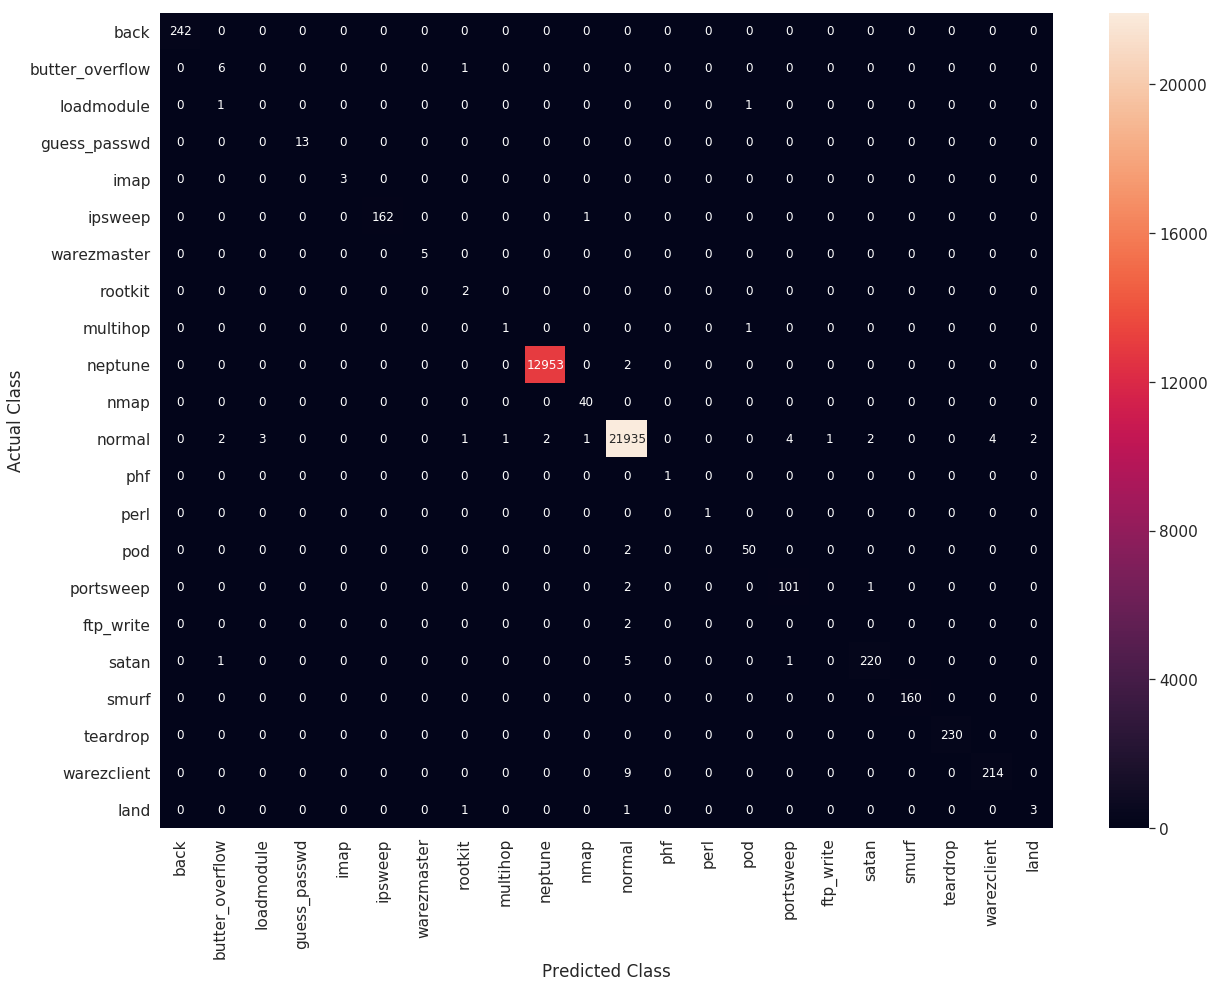

Precision score is:
0.9985725203434188
Recall score is:
0.9984888864466852
F1-score is:
0.9985170986631958


In [351]:
decision_tree_grid_results = model(decision_tree_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [145]:
print_grid_search_attributes(decision_tree_grid)

---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 50, 'min_samples_split': 5}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9983056901336215



In [146]:
joblib.dump(decision_tree_grid.best_estimator_, 'decision_tree_gs.pkl')

['decision_tree_gs.pkl']

In [147]:
decision_tree_grid_results

{'accuracy': 0.9986537351979559,
 'f1_score': 0.9986665006583796,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>,
 'precision': 0.9987044584861715,
 'recall': 0.9986537351979559}

<h6> Observations from applying Decision Tree Classifier:- </h6>


    
    
- Out of the 21958 Normal connection points, 21935 (99.89%) were correctly classified by the Decision Tree Classifier.
    

- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12953, out of which 12955(99.98%) were classified correctly.
 
 
- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100% accuracy, class butter_overflow with (6/7) 85.71% accuracy, class warezmaster with(5/5) 100% accuracy, class land with(3/5) 60% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(2/2) 100% accuracy, class multihop with (1/2) 50% accuracy, class ftp_write with(0/2) 0% accuracy, class phf with (1/1) 100% accuracy and class perl with (1/1) 100% accuracy.
    
    
- The Decision Tree Classifier was able to classify points with better accuracy of 99.86 and high f1 score of 0.9986 compared to all the previous Classifiers. 


- True Postives = 21935


- TPR = 0.9989


- False Positives = 23


- FPR = 0.0016


- The DT Classifier has the lowest FPR compared to all of the above models.


- Thus a non linear model like DT is able to learn the pattern from the data better compared to the linear classifiers.
        

<h3> Model_5 :- Random Forest </h3>

In [148]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.4min finished


Completed
Time taken: 0:13:34.289641
Prediction on test data:
Completed
Time taken: 0:00:03.366177
Performance metrics:
Accuracy is:
0.9992581806192818
Confusion Matrix is:


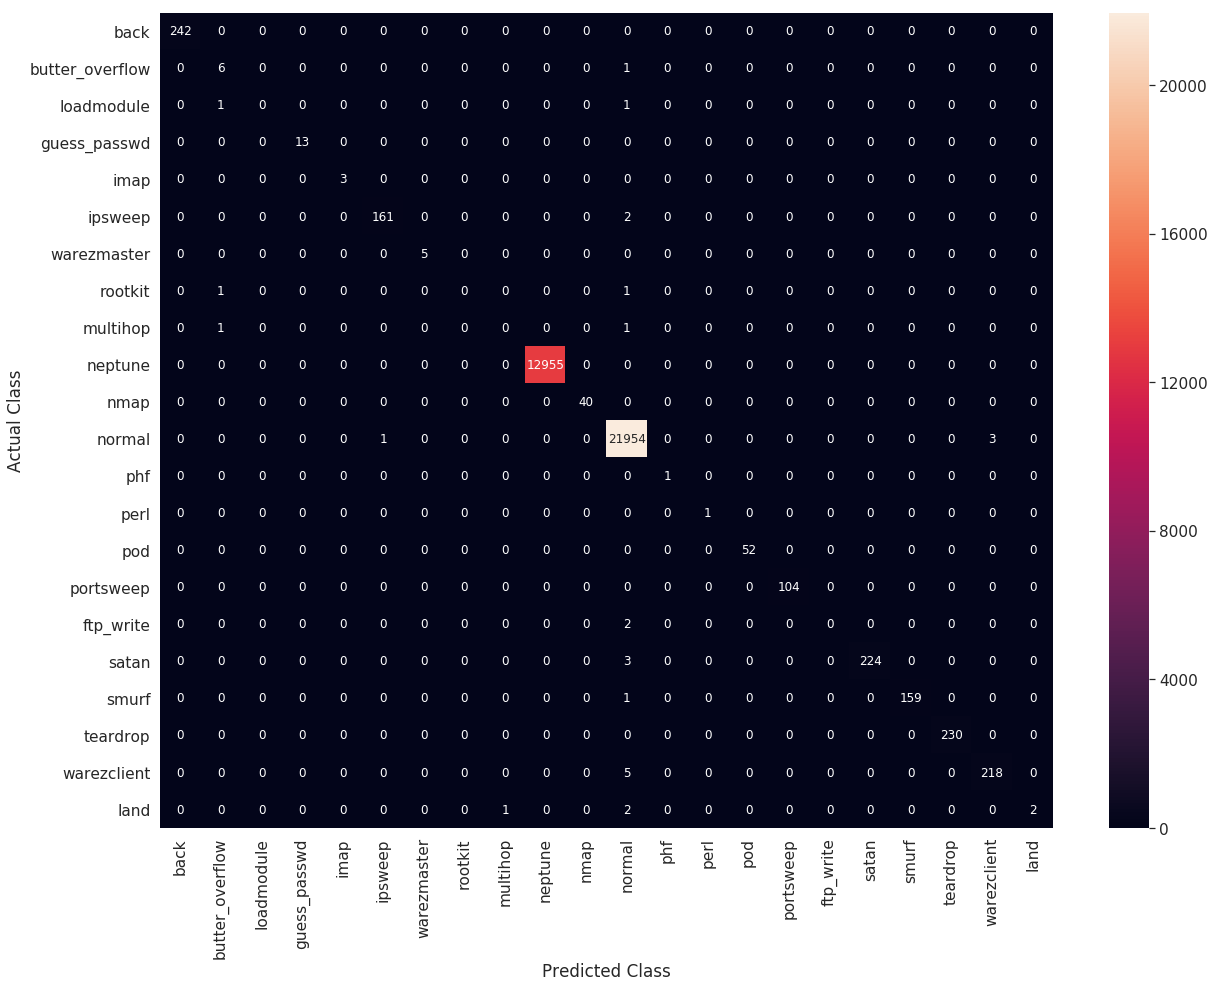

Precision score is:
0.9990836144454115
Recall score is:
0.9992581806192818
F1-score is:
0.9991503940116365


In [149]:
rf_grid_results = model(rf_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [150]:
print_grid_search_attributes(rf_grid)

---------------------------
|      Best Estimator     |
---------------------------

	RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 100, 'min_samples_split': 5, 'n_estimators': 500}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------


In [151]:
rf_grid_results

{'accuracy': 0.9992581806192818,
 'f1_score': 0.9991503940116365,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>,
 'precision': 0.9990836144454115,
 'recall': 0.9992581806192818}

In [152]:
joblib.dump(rf_grid.best_estimator_, 'rf_gs.pkl')

['rf_gs.pkl']

<h6> Observations from applying Random Forest Classifier:- </h6>


    
    
- Out of the 21958 Normal connection points, 21954 (99.98%) were correctly classified by the RF Classifier.
    

- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12955(100%) were classified correctly.
    

- Out of the classes having very less no. of data points, class guess_passwd was classified with (13/13) 100% accuracy, class butter_overflow with (6/7) 85.71% accuracy, class warezmaster with(5/5) 100% accuracy, class land with(2/5) 80% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, class phf with (1/1) 100% accuracy and class perl with (1/1) 100% accuracy.
    

- The RF Classifier was able to classify the Normal connection points with the highest accuracy compared to all of the above classifiers. 
        

- But this classifier was still unable to correctly classify bad connection classes like loadmodule, rootkit and ftp_write.


- True Postives = 21954


- TPR = 0.9998


- False Positives = 19


- FPR = 0.0013


- The RF Classifier has the lowest FPR compared to all of the above models.

        

<h3> Model_6 :- XGBoost </h3>

In [153]:
hyperparameter = {'max_depth':[2, 3, 5, 7, 10], 'n_estimators': [10, 50, 100, 200, 500]}

from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softprob')
xgb_grid = GridSearchCV(xgb, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 51.3min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 143.6min finished


Completed
Time taken: 3:03:05.132510
Prediction on test data:
Completed
Time taken: 0:00:19.979108
Performance metrics:
Accuracy is:
0.999395554578674
Confusion Matrix is:


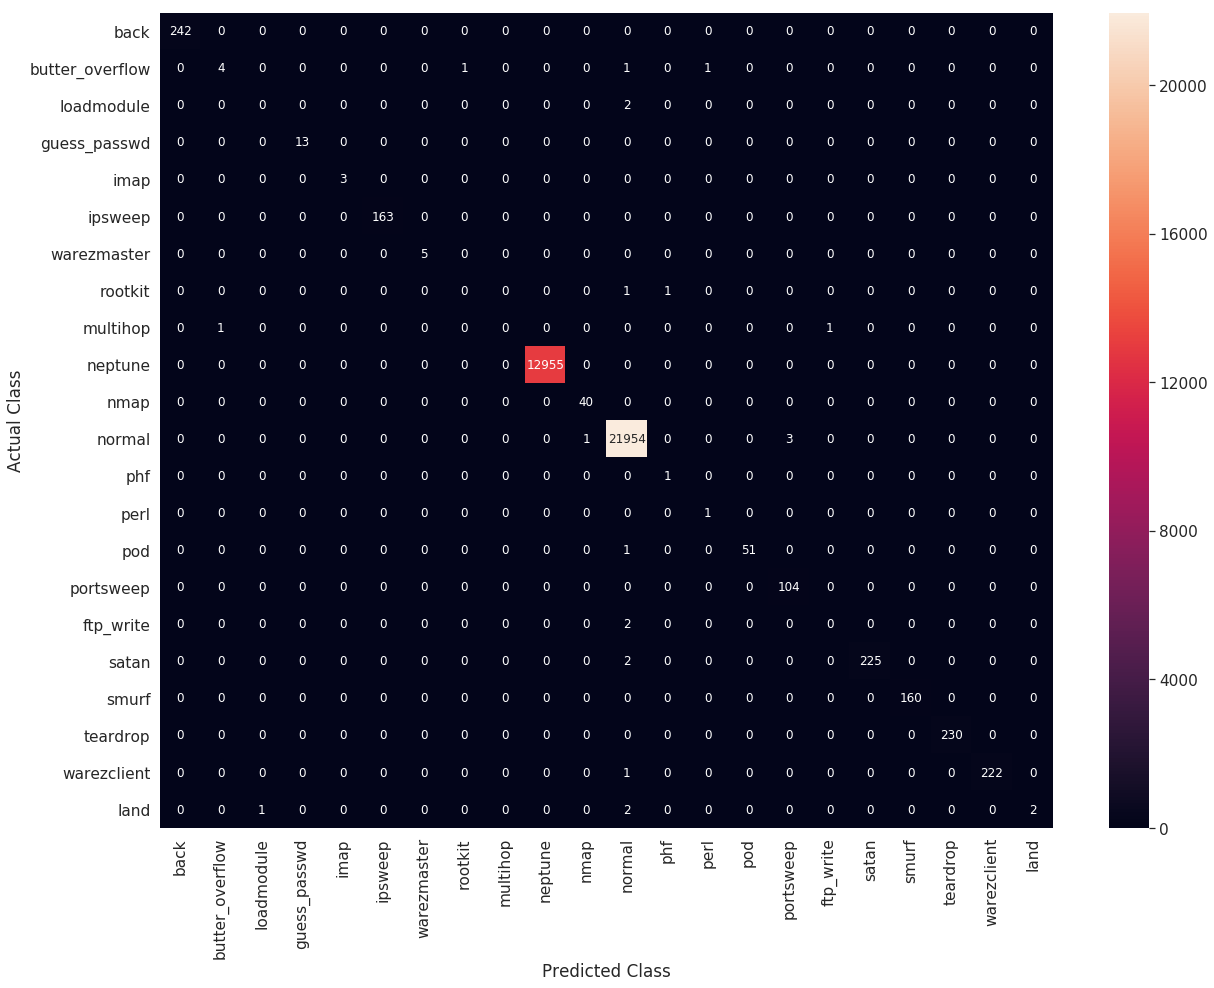

Precision score is:
0.9992777666506591
Recall score is:
0.999395554578674
F1-score is:
0.9993097150048047


In [154]:
xgb_grid_results = model(xgb_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [155]:
print_grid_search_attributes(xgb_grid)

---------------------------
|      Best Estimator     |
---------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 5, 'n_estimators': 500}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 


In [158]:
xgb_grid_results

{'accuracy': 0.999395554578674,
 'f1_score': 0.9993097150048047,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>,
 'precision': 0.9992777666506591,
 'recall': 0.999395554578674}

In [159]:
joblib.dump(xgb_grid.best_estimator_, 'xgb_gs.pkl')

['xgb_gs.pkl']

<h6> Observations from applying XG Boost Classifier:- </h6>


    
    
- Out of the 21958 Normal connection points, 21954 (99.98%) were correctly classified by the XGB Classifier.


- Out of the 17409 points belonging to Bad connections, class Neptune has the highest no. of data points 12955, out of which 12955(100.0%) were classified correctly.


- Out of the classes having very less no. of data points, class guess_passwd was classified with (12/13) 92.30% accuracy, class butter_overflow with (4/7) 57.41% accuracy, class warezmaster with(5/5) 100% accuracy, class land with(2/5) 40% accuracy, class imap with(3/3) 100% accuracy, class loadmodule with (0/2) 0% accuracy, class rootkit with(0/2) 0% accuracy, class multihop with (0/2) 0% accuracy, class ftp_write with(0/2) 0% accuracy, class phf with (1/1) 0% accuracy and class perl with (1/1) 100% accuracy.

    
- The XGB Classifier was able to classify different classes with the highest accuracy(99.93%) and f1-score(0.9993) comapred to all of the above models.
  
  
- This classifier was still unable to correctly classify most of the bad connection classes like loadmodule, rootkit, phf, multihop and ftp_write.


- True Postives = 21954


- TPR = 0.9998


- False Positives = 12


- FPR = 0.00083


- The XGB Classifier has the lowest FPR compared to all of the above models and thus, it's our best model.   

<h5>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>

<h2> Observation from ALL of the above classifiers:- </h2>

- If we consider NORMAL connection points as 1 class and points belonging to all the other 22 BAD connection classes as the 2nd class, then XGB Classifier is the best classifier with ~99.94 accuracy and 0.99938 f1-score and the Random  Classifier is the 2nd best classifier with 99.91 accuracy and 0.99905 f1-score.


- Also, the XGB Classifier has the best TPR and FPR of 0.9998 and 0.00083.
        

- Although XGB classifier had a better accuracy than the RF classifier, if we go into details of the confusion matrix scores, we can observe that both classifiers have performed similarly on the different categories of attacks on our  dataset.


- The RF Classifier has TPR and FPR of 0.9998 and 0.0013.
    

- The overall time taken for training + evaluation was less in RF classifier compared to the XGB classifier.
    

- A common pattern shown by all of the classifiers is that classes rootkit, ftp_write and loadmodule were classified as class Normal by most of the classifiers.
        

- We will add more features in our dataset and try to improve the classifier performance.
    

- As DT, RF & XGB had the best performance, we will use these 2 classifiers ahead on the existing + feature engineered data.

<h5>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>

<h2> Adding new features:- </h2>

<h3> 1. Clustering features (using MiniBatchKmeans):- </h3>

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

In [148]:
data = pd.read_pickle('data.pkl')
print('Shape of our dataset', data.shape)

Shape of our dataset (145586, 42)


In [149]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

In [150]:
kmeans = MiniBatchKMeans(n_clusters=23, random_state=0, batch_size=128, max_iter=100)
kmeans.fit(X_train_1)

MiniBatchKMeans(batch_size=128, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=23, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [151]:
train_cluster = kmeans.predict(X_train_1)
test_cluster = kmeans.predict(X_test_1)

In [152]:
print('Length of train cluster',len(train_cluster))
train_cluster

Length of train cluster 109189


array([8, 0, 1, ..., 4, 4, 1], dtype=int32)

In [153]:
print('Length of test cluster',len(train_cluster))
test_cluster

Length of test cluster 109189


array([ 1, 22,  8, ...,  0, 17,  8], dtype=int32)

In [154]:
train_cluster = np.array([train_cluster])
train_cluster.shape

(1, 109189)

In [155]:
test_cluster = np.array([test_cluster])
test_cluster.shape

(1, 36397)

<h3> 2. PCA features :- </h3>

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- We will add top 5 PCA features to our dataset. (We can add more or less and test if they improve the performance)

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca = PCA(n_components=5)
pca.fit(X_train_1.toarray())
pca_train = pca.transform(X_train_1.toarray())
pca_test = pca.transform(X_test_1.toarray())

In [136]:
print(pca_train.shape)
print(pca_test.shape)

(109189, 5)
(36397, 5)


<h3> 3. Additional feature engineering :-</h3>

<h6> src_bytes + dst_bytes </h6>

In [137]:
feature_src_dst_1 = src_bytes1 + dst_bytes1
feature_src_dst_2 = src_bytes2 + dst_bytes2

In [138]:
feature_src_dst_1.shape

(109189, 1)

<h6> src_bytes - dst_bytes </h6>

In [139]:
feature_src_dst_3 = abs(src_bytes1 - dst_bytes1)
feature_src_dst_4 = abs(src_bytes2 - dst_bytes2)

In [140]:
feature_src_dst_3.shape

(109189, 1)

<h5> same_srv_rate + diff_srv_rate :- </h5>

In [141]:
feature_5 = same_srv_rate1 + diff_srv_rate1
feature_6 = same_srv_rate2 + diff_srv_rate2

In [142]:
feature_5.shape

(109189, 1)

<h5> dst_host_same_srv_rate + dst_host_diff_srv_rate :- </h5>

In [143]:
feature_7 = dst_host_same_srv_rate1 + dst_host_diff_srv_rate1
feature_8 = dst_host_same_srv_rate2 + dst_host_diff_srv_rate2

In [144]:
feature_7.shape

(109189, 1)

<h2> Adding clustering and PCA features to our dataset with the additional 4 features:- </h2>

In [157]:
X_train_2 = hstack((X_train_1, pca_train, train_cluster.T, feature_src_dst_1, feature_src_dst_3, feature_5, feature_7))

In [158]:
X_test_2 = hstack((X_test_1, pca_test, test_cluster.T, feature_src_dst_2, feature_src_dst_4, feature_6, feature_8))

In [159]:
print('Train data:')
print(X_train_2.shape)
print('='*30)
print('Test data:')
print(X_test_2.shape)

Train data:
(109189, 126)
Test data:
(36397, 126)


<h2> Model_1 :- Decision Tree </h2>

In [160]:
hyperparameter = {'max_depth':[5, 10, 20, 50, 100, 500], 'min_samples_split':[5, 10, 100, 500]}

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced')
decision_tree_grid = GridSearchCV(decision_tree, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   42.3s finished


Completed
Time taken: 0:00:47.296728
Prediction on test data:
Completed
Time taken: 0:00:00.015047
Performance metrics:
Accuracy is:
0.9985713108223205
Confusion Matrix is:


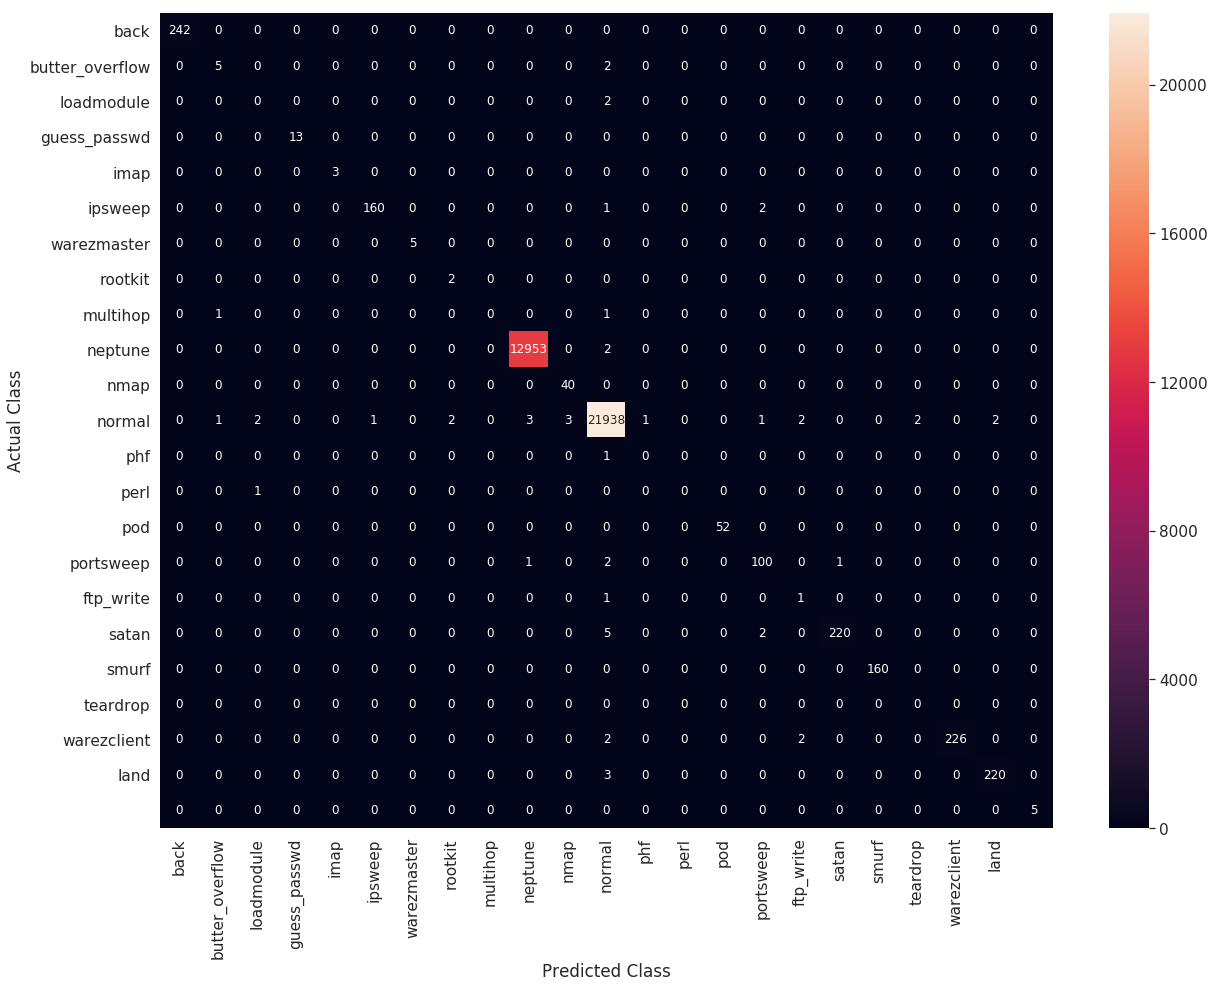

Precision score is:
0.9986705212449525
Recall score is:
0.9985713108223205
F1-score is:
0.9986095727342528


In [161]:
decision_tree_grid_results2 = model(decision_tree_grid, X_train_2.toarray(), Y_train, X_test_2.toarray(), Y_test)

In [162]:
print_grid_search_attributes(decision_tree_grid)

---------------------------
|      Best Estimator     |
---------------------------

	DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=500,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 500, 'min_samples_split': 5}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

	0.9982965317019113



In [163]:
decision_tree_grid_results2

{'accuracy': 0.9985713108223205,
 'f1_score': 0.9986095727342528,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>,
 'precision': 0.9986705212449525,
 'recall': 0.9985713108223205}

In [164]:
joblib.dump(decision_tree_grid.best_estimator_, 'dt2.pkl')

['dt2.pkl']

<h5> Observation from DT-2 Classifier :- </h5>
    
    
- The Decision Tree Classifier was able to classify points with better accuracy of ~99.86 and high f1 score of ~0.9986 which is 
similar to the performance of the 1st Decision Tree Classifier.


- True Postives = 21938


- TPR = 0.9990


- False Positives = 22


- FPR = 0.0015


- This DT Classifier has comparatively better TPR and FPR than DT-1 model.

<h2> Model_2 :- Random Forest  </h2>

In [165]:
hyperparameter = {'max_depth':[5, 10, 100, 500, 1000], 'n_estimators': [5, 10, 50, 100, 500],
                  'min_samples_split':[5, 10, 100, 500]}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.0min finished


Completed
Time taken: 0:19:54.685734
Prediction on test data:
Completed
Time taken: 0:00:03.172853
Performance metrics:
Accuracy is:
0.9990658570761326
Confusion Matrix is:


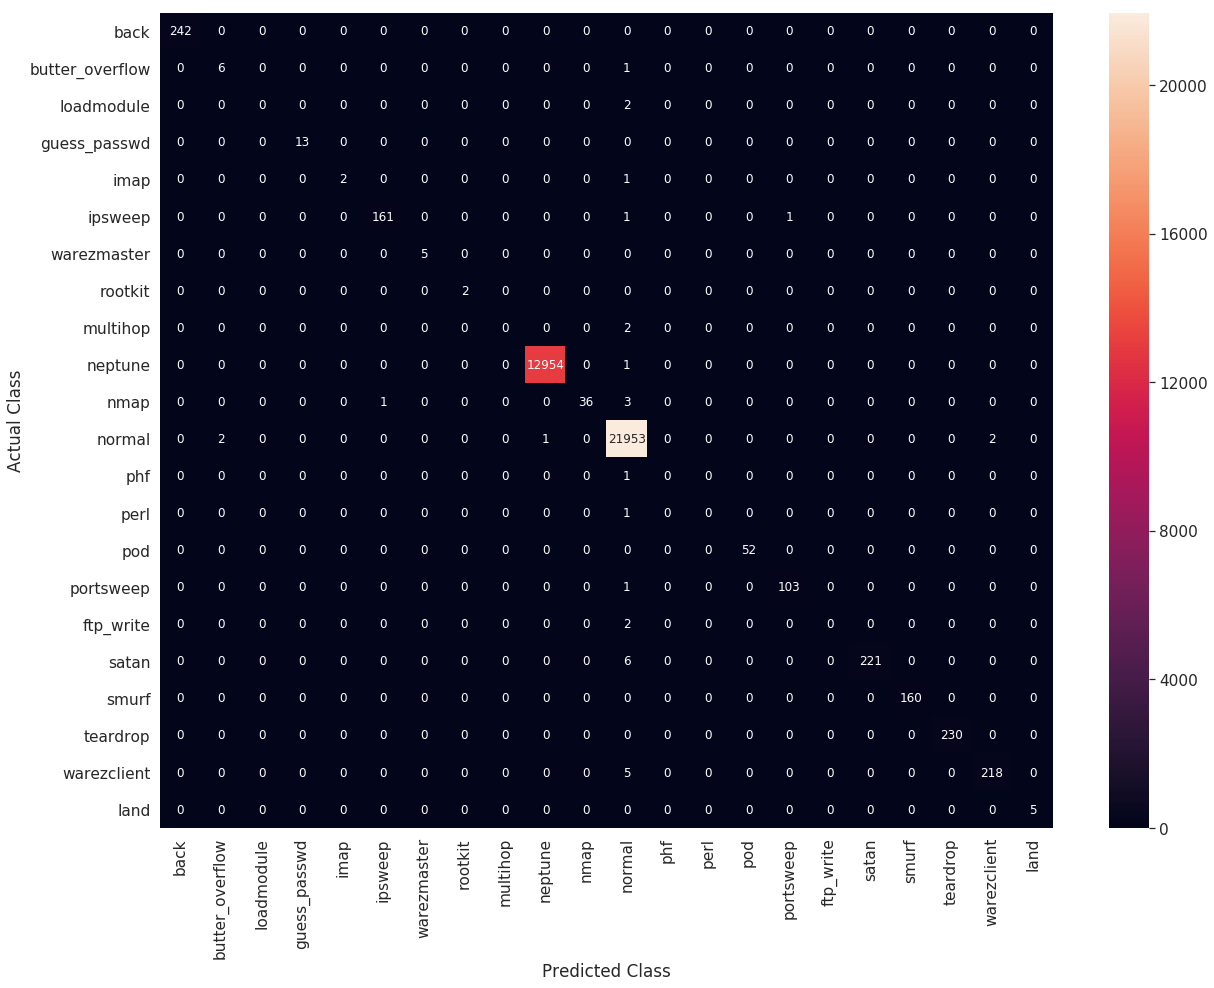

Precision score is:
0.9988527510234636
Recall score is:
0.9990658570761326
F1-score is:
0.9989514040207459


In [167]:
rf_grid_results2 = model(rf_grid, X_train_2.toarray(), Y_train, X_test_2.toarray(), Y_test)

In [168]:
print_grid_search_attributes(rf_grid)

---------------------------
|      Best Estimator     |
---------------------------

	RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'max_depth': 500, 'min_samples_split': 10, 'n_estimators': 500}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
--------------------------

In [169]:
rf_grid_results2

{'accuracy': 0.9990658570761326,
 'f1_score': 0.9989514040207459,
 'model': <function __main__.model(model_name, X_train, Y_train, X_test, Y_test)>,
 'precision': 0.9988527510234636,
 'recall': 0.9990658570761326}

In [170]:
joblib.dump(rf_grid.best_estimator_, 'rf2.pkl')

['rf2.pkl']

<h5> Observation from RF_2 Classifier :- </h5>
    
    
- This RF Classifier has a lower accuracy(99.90) and f1-score(0.9990) compared to the RF_1 Classifier.


- True Postives = 21953


- TPR = 0.9997


- False Positives = 27


- FPR = 0.0018


- This RF Classifer has a lower TPR and higher FPR than the RF_1 model, which indicates that adding new features have not resulted in any improvement in RF Classifier performance.


- The no. of false positives are more than the DT_2 classifier which is a Drawback of this model.

<h2> Model_3 :- XG Boost </h2>

- We will apply the XG Boost classifier on  the same dataset and check if it shows any improvement.

In [360]:
from sklearn.model_selection import RandomizedSearchCV

In [361]:
hyperparameter = {'max_depth':[2, 3, 5, 7, 10], 'n_estimators': [10, 50, 100, 200, 500]}

from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softprob', n_jobs=-1)
xgb_grid = RandomizedSearchCV(xgb, param_distributions=hyperparameter, cv=3, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 57.3min finished


Completed
Time taken: 1:01:28.545898
Prediction on test data:
Completed
Time taken: 0:00:02.214122
Performance metrics:
Accuracy is:
0.999395554578674
Confusion Matrix is:


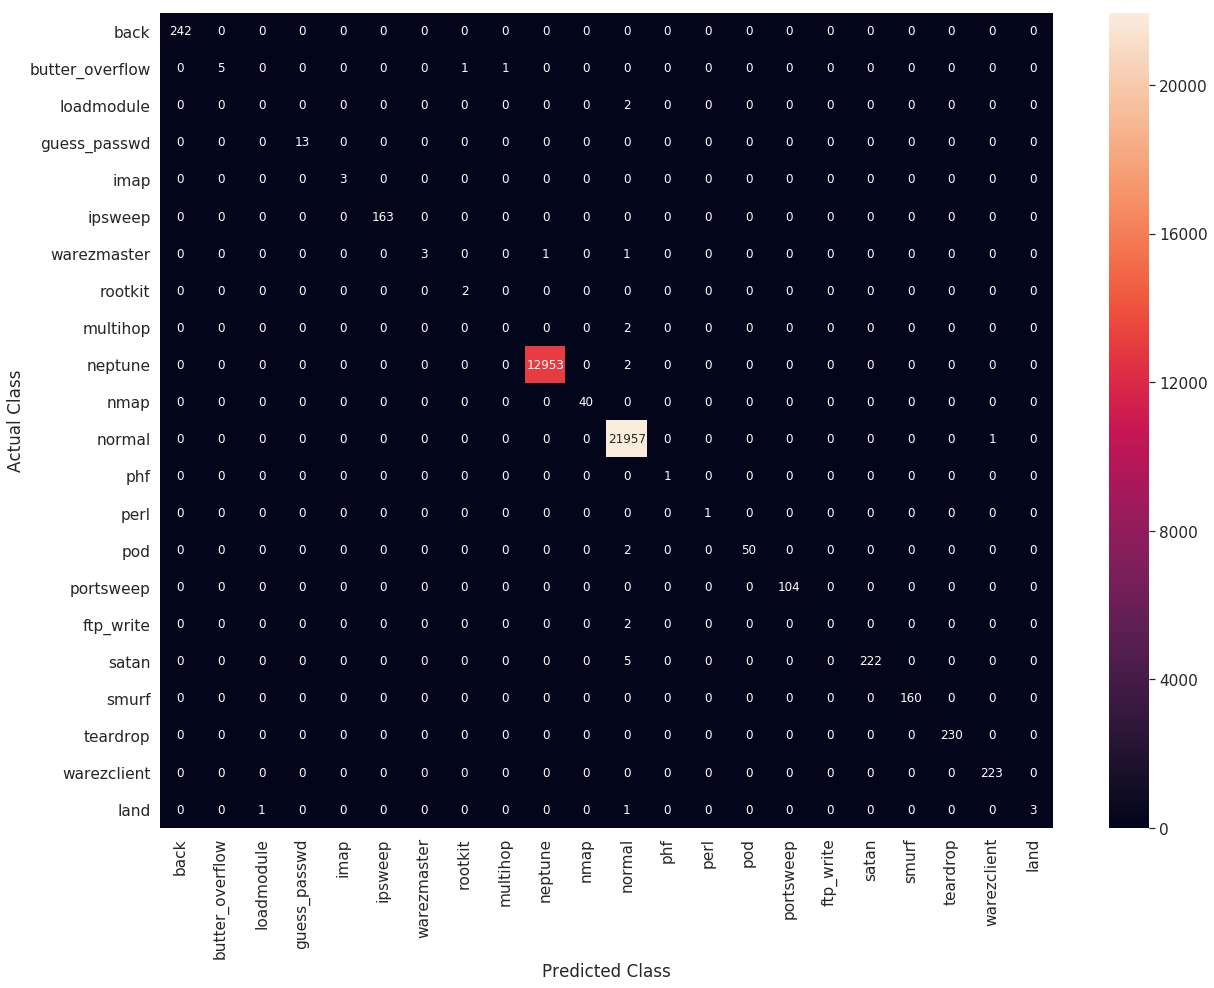

Precision score is:
0.9992952742997511
Recall score is:
0.999395554578674
F1-score is:
0.9993238515348185


In [363]:
xgb_grid_results2 = model(xgb_grid, X_train_2.toarray(), Y_train, X_test_2.toarray(), Y_test)

In [364]:
print_grid_search_attributes(xgb_grid)

---------------------------
|      Best Estimator     |
---------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

---------------------------
|     Best parameters     |
---------------------------
	Parameters of best estimator : 

	{'n_estimators': 200, 'max_depth': 3}

----------------------------------
|   No of CrossValidation sets   |
----------------------------------

	Total numbre of cross validation sets: 3

---------------------------
|        Best Score       |
---------------------------

	Average Cross Validate scores of best estimator : 

In [365]:
joblib.dump(xgb_grid.best_estimator_, 'xgb2_gs.pkl')

['xgb2_gs.pkl']

<h5> Observation from XGBoost_2 Classifier :- </h5>
    
    
- This XG Boost Classifier was able to classify points with better accuracy of ~99.94 and high f1 score of ~0.9994 which is 
similar to the performance of the 1st XGB Classifier.


- True Postives = 21957


- TPR = 0.9999


- False Positives = 17


- FPR = 0.0011


- This XGB Classifier has the highest TPR of (~100%), but the FPR(0.0011) is more than the XGB1 model(0.0008), which is a drawback.

<h4> Important Observation from the above 3 models:- </h4>

    
- From the performance scores we have obtained from the above 3 models, we can conclude that adding new features has increased the TPR score as the no. correct classification of "Normal" class points has increased, but that has also increased the FPR score for all 3 models.

# Summarizing Results :-

In [172]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Model', 'Accuracy', 'f1-score', 'TPR', 'FPR']
x.add_row(['Naive Bayes','97.39%','0.9670','99.44%','5.70%'])
x.add_row(['Logistic Regression','98.47%','0.9802','99.80%','3.60%'])
x.add_row(['Support Vector Machine','99.70%','0.9968','99.83%','0.38%'])
x.add_row(['Decision Tree - 1','99.86%','0.9986','99.89%','0.16%'])
x.add_row(['Random Forest - 1','99.92%','0.9992','99.98%','0.13%'])
x.add_row(['XG Boost - 1','99.93%','0.9993','99.98%','0.08%'])
x.add_row(['Decision Tree - 2','99.86%','0.9986','99.90%','0.15%'])
x.add_row(['Random Forest - 2','99.90%','0.9990','99.97%','0.18%'])
x.add_row(['XG Boost - 2','99.93%','0.9993','99.99%','0.11%'])

print(x)

+------------------------+----------+----------+--------+-------+
|         Model          | Accuracy | f1-score |  TPR   |  FPR  |
+------------------------+----------+----------+--------+-------+
|      Naive Bayes       |  97.39%  |  0.9670  | 99.44% | 5.70% |
|  Logistic Regression   |  98.47%  |  0.9802  | 99.80% | 3.60% |
| Support Vector Machine |  99.70%  |  0.9968  | 99.83% | 0.38% |
|   Decision Tree - 1    |  99.86%  |  0.9986  | 99.89% | 0.16% |
|   Random Forest - 1    |  99.92%  |  0.9992  | 99.98% | 0.13% |
|      XG Boost - 1      |  99.93%  |  0.9993  | 99.98% | 0.08% |
|   Decision Tree - 2    |  99.86%  |  0.9986  | 99.90% | 0.15% |
|   Random Forest - 2    |  99.90%  |  0.9990  | 99.97% | 0.18% |
|      XG Boost - 2      |  99.93%  |  0.9993  | 99.99% | 0.11% |
+------------------------+----------+----------+--------+-------+


<h5> - The model XG Boost_1 is our best model for intrusion detection as it has highest accuracy 99.93%, f1-score 0.9993 and TPR 99.99%  as well as the least FPR of 0.08%. </h5>